# **Ballestic Deposition**
Ballistic deposition is a mathematical model used to simulate the growth of thin films or surfaces, particularly in the context of physical processes like the deposition of particles onto a substrate. In this model, particles are added to a surface one at a time, and they follow a ballistic motion during deposition.



1.   **Sequential Deposition**: Particles are added one by one to the substrate.
2.   **Ballistic Motion**: Each particle follows a straight-line trajectory until it collides with an obstacle, such as a previously deposited particle.
3.  **Nearest Neighbor Influence**: The decision of where a particle lands is influenced by its nearest neighbors. In this code, I have implemented both non-periodic and periodic nearest neighbor functions (is_nn) to determine whether a particle can be deposited at a specific location.



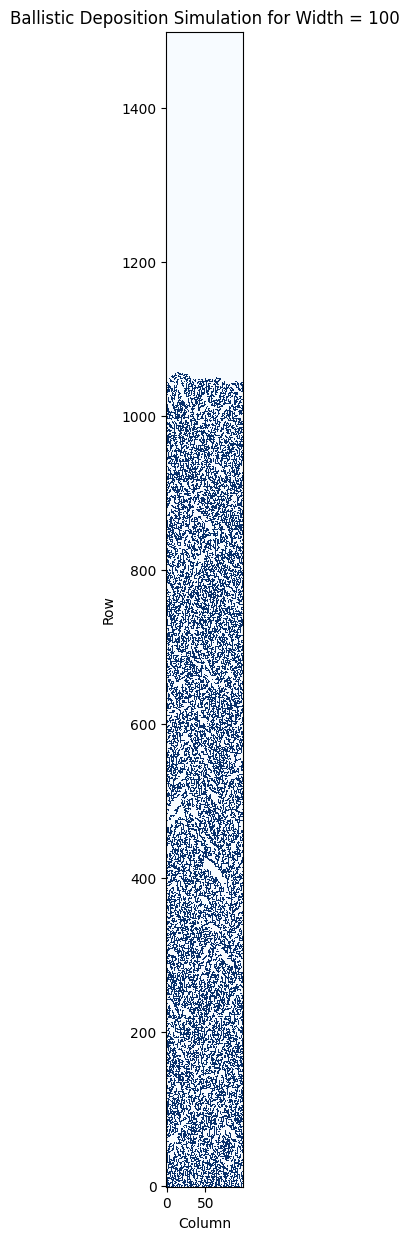

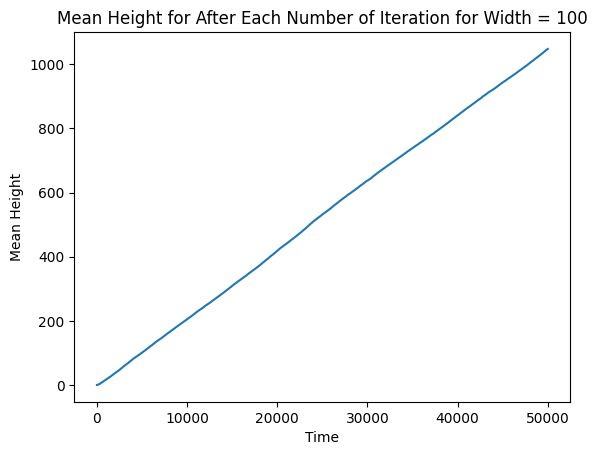

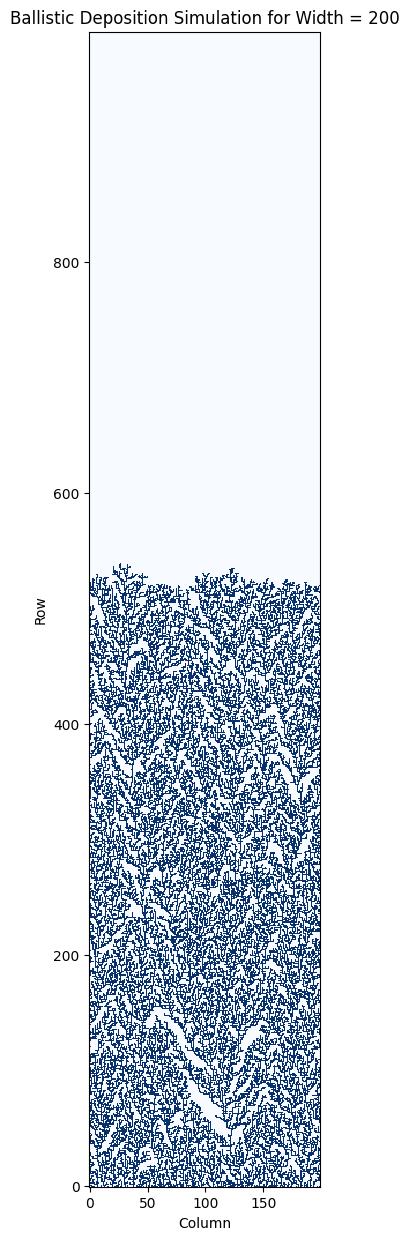

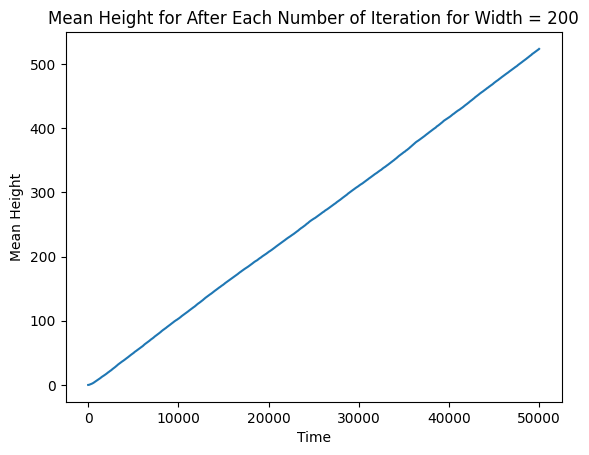

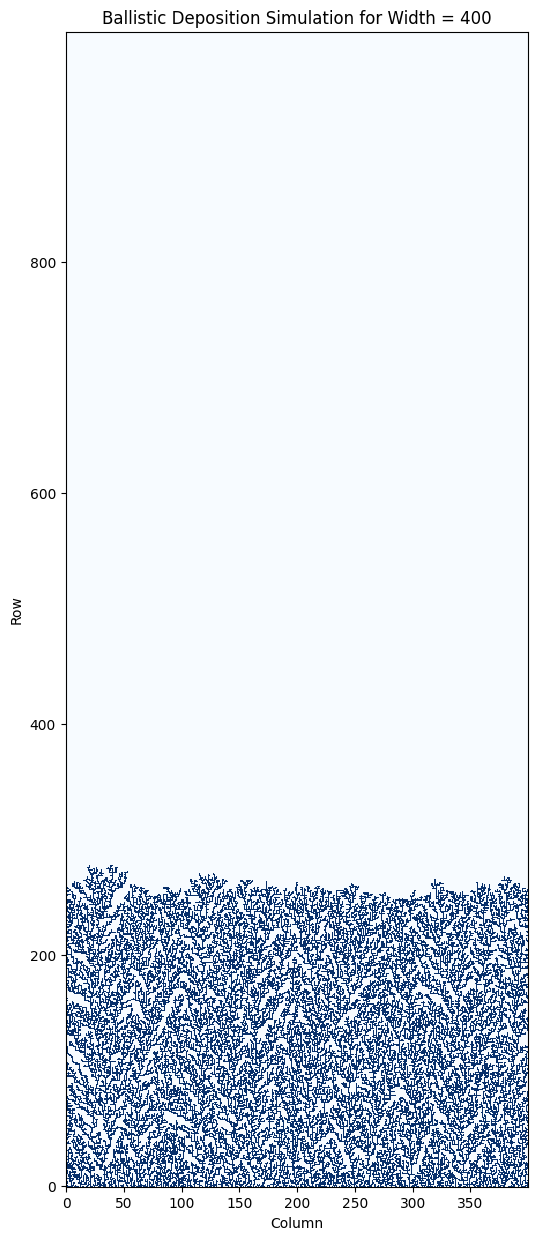

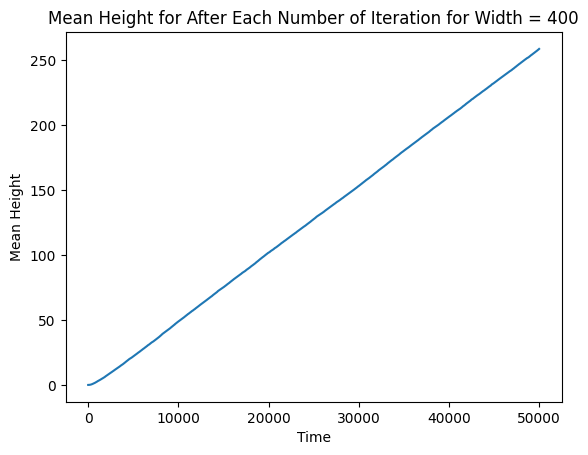

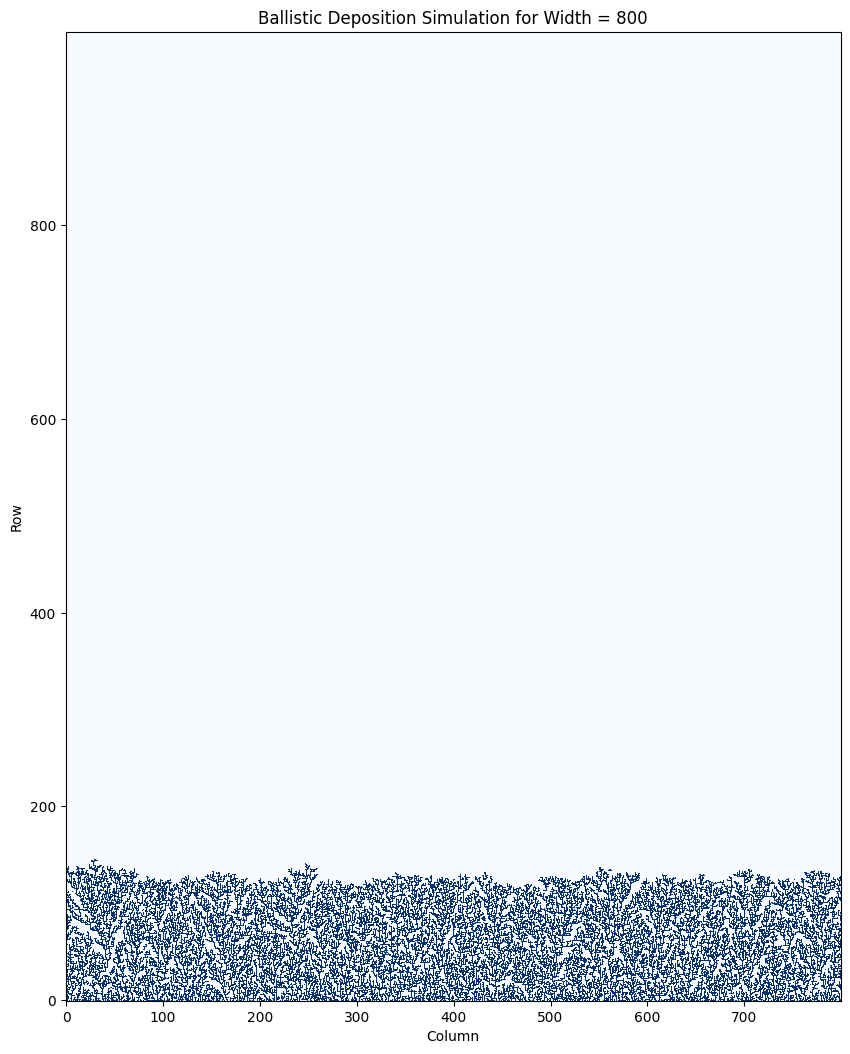

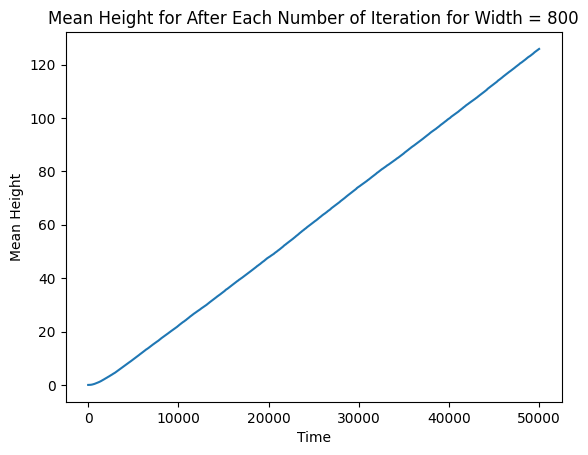

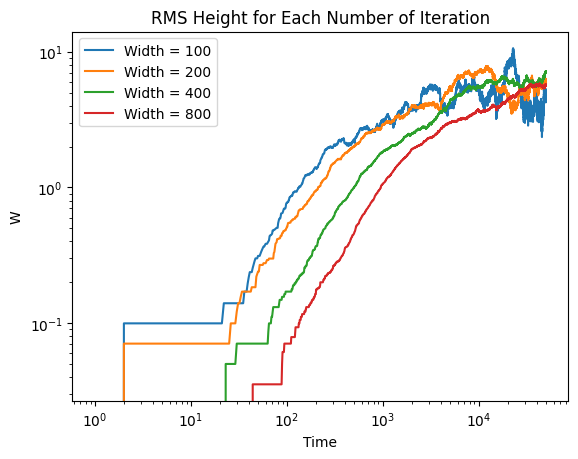

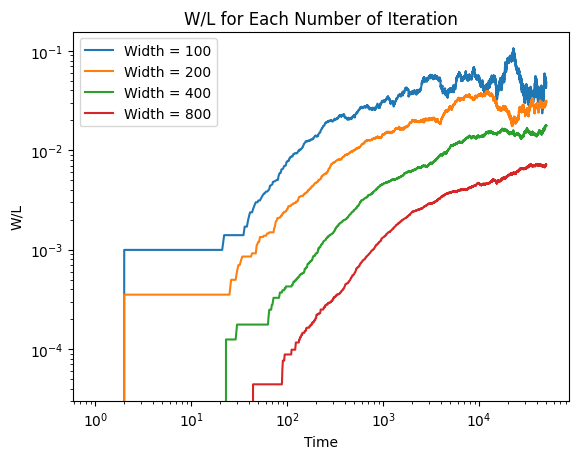

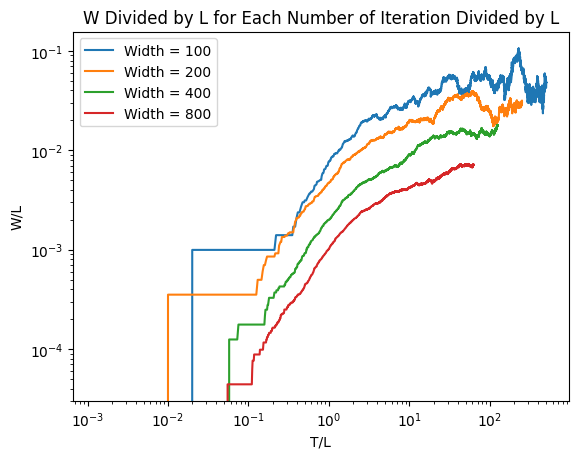

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

      # Non-Periodic Nearest Neighbor Function
# def is_nn(substrate, row, col, width):
#     if row > 0 and (col != width - 1) and (substrate[row - 1, col] == 1 or substrate[row, col + 1] == 1 or substrate[row, col - 1] == 1):
#         substrate[row, col] = 1
#     elif row > 0 and col == width - 1 and (substrate[row - 1, col] == 1 or substrate[row, col - 1] == 1):
#         substrate[row, col] = 1
#     elif row > 0 and col == 0 and (substrate[row - 1, col] == 1 or substrate[row, col + 1] == 1):
#         substrate[row, col] = 1
#     elif row == 0:
#         substrate[row, col] = 1
#     else:
#         return 1

      # Periodic Nearest Neighbor Function
def is_nn(substrate, row, col, width):

    if row == 0:
        substrate[row, col] = 1

    elif substrate[row - 1, col] == 1 or substrate[row, (col + 1) % width] == 1 or substrate[row, (col - 1) % width] == 1:
        substrate[row, col] = 1

    else:
        return 1


def ballistic_deposition(width, height, num_particles):
    substrate = np.zeros((height, width), dtype=int)
    heights = np.zeros(width)
    mean_ht = np.zeros(num_particles)
    w = np.zeros(num_particles)

    for j in range(num_particles):

        col = np.random.randint(0, width)

        for row in range(height-1, -1, -1):
            if is_nn(substrate, row, col, width) != 1:
                break

        heights[col] = row
        mean_ht[j] = np.mean(heights)
        w[j] = np.sqrt(np.mean((heights - np.mean(heights)) ** 2))


    return substrate, mean_ht, w

def plot_substrate(substrate, width):
    plt.figure(figsize=(10, 15))
    plt.imshow(substrate, cmap='Blues', origin='lower', interpolation='nearest')
    plt.title(f'Ballistic Deposition Simulation for Width = {width}')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()

def plot_mean_heights(mean_h_t, width):
    plt.plot(mean_h_t)
    plt.title(f'Mean Height for After Each Number of Iteration for Width = {width}')
    plt.xlabel('Time')
    plt.ylabel('Mean Height')
    plt.show()

def plot_width(w, particle_numbers, width):
    num_p = np.arange(0, particle_numbers)
    for i in range(len(width)):
        w_i = w[:, i].flatten()
        plt.loglog(num_p, w_i, label=f'Width = {width[i]}')
    plt.title('RMS Height for Each Number of Iteration')
    plt.xlabel('Time')
    plt.ylabel('W')
    plt.legend()
    plt.show()

def plot_dimless_y(w, particle_numbers, width):
    num_p = np.arange(0, particle_numbers)
    for i in range(len(width)):
        w_i = (w[:, i].flatten()) / width[i]
        plt.loglog(num_p, w_i, label=f'Width = {width[i]}')
    plt.title('W/L for Each Number of Iteration')
    plt.xlabel('Time')
    plt.ylabel('W/L')
    plt.legend()
    plt.show()

def plot_dimless(w, particle_numbers, width):
    num_p = np.arange(0, particle_numbers)
    for i in range(len(width)):
        w_i = (w[:, i].flatten()) / width[i]
        time = num_p / width[i]
        plt.loglog(time, w_i, label=f'Width = {width[i]}')
    plt.title('W Divided by L for Each Number of Iteration Divided by L')
    plt.xlabel('T/L')
    plt.ylabel('W/L')
    plt.legend()
    plt.show()

def ballistic(width, height, num_particles):
    substrate, mean_h_t, w = ballistic_deposition(width, height, num_particles)
    plot_substrate(substrate, width)
    plot_mean_heights(mean_h_t, width)
    return w

if __name__ == "__main__":
  num_particles = 50000
  width = [100, 200, 400, 800]

  w = np.zeros((num_particles, len(width)))

  for i in range(len(width)):
      if i == 0:
        w[:, i] = ballistic(width[i], 1500, num_particles)
      else:
        w[:, i] = ballistic(width[i], 1000, num_particles)

  plot_width(w,num_particles, width)
  plot_dimless_y(w,num_particles, width)
  plot_dimless(w,num_particles, width)

# **Applications of Ballistic Deposition Models in Science and Engineering**
Ballistic deposition models are used in various scientific and engineering contexts to simulate and understand the growth of thin films or surfaces. Some common applications and use cases for ballistic deposition include:


1.   **Semiconductor Manufacturing**: In the field of semiconductor manufacturing, the growth of thin films on substrates is a critical process. Ballistic deposition models can provide insights into how deposition conditions, such as particle size and density, impact the film's properties and uniformity.
2.   **Surface Coating**: Ballistic deposition simulations are employed to study the coating of surfaces with thin layers of material. This is relevant in industries such as automotive, where coatings are applied to enhance durability, corrosion resistance, or aesthetic appeal.
3.  **Material Science**: Researchers use ballistic deposition models to investigate the properties of materials and the formation of nanostructures. Understanding the growth mechanisms is crucial for designing materials with specific characteristics.
4.  **Nanotechnology**: In the field of nanotechnology, where the manipulation and control of materials at the nanoscale are essential, ballistic deposition models can be used to predict and optimize the growth of nanostructures.
5.  **Thin Film Technologies**: Ballistic deposition simulations contribute to the development and optimization of thin film technologies, including those used in electronic devices, solar cells, and sensors.
6.  **Surface Roughness Studies**: The study of surface roughness and morphology is important in various applications, such as determining the quality of coatings, understanding friction and adhesion properties, and optimizing surfaces for specific functionalities.
7.  **Pattern Formation**: Ballistic deposition models can be employed to study pattern formation and self-organization processes in growing films, which is relevant in fields like physics, chemistry, and biology.
8.  **Mathematical Modeling and Simulation**: Ballistic deposition provides a simple and computationally efficient model for studying growth processes. Researchers use these simulations to test theoretical predictions, validate models, and gain a better understanding of the underlying physics.
9.  **Educational Purposes**: Ballistic deposition models serve as educational tools for introducing concepts related to stochastic processes, pattern formation, and the behavior of complex systems.


/tmp/ipython-input-117403089.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


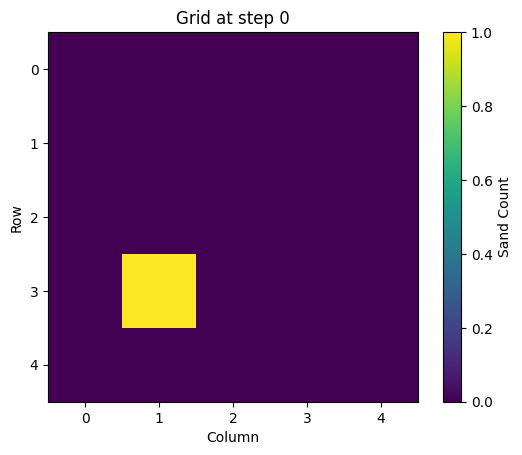

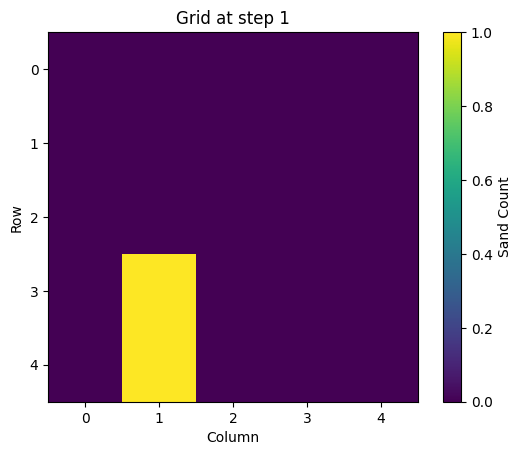

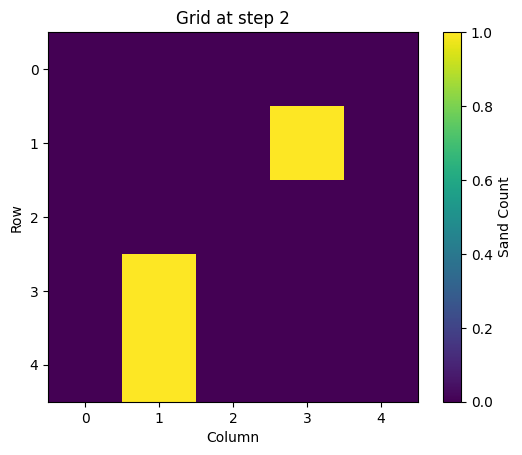

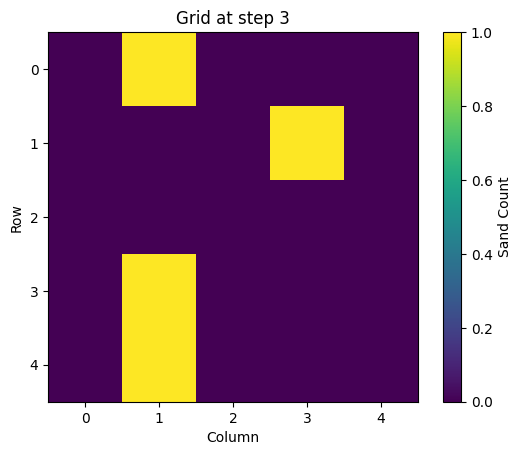

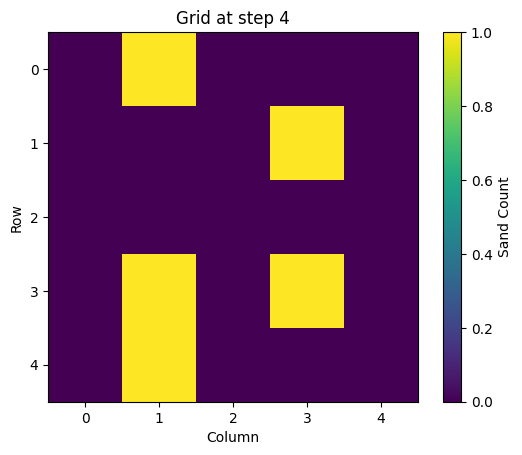

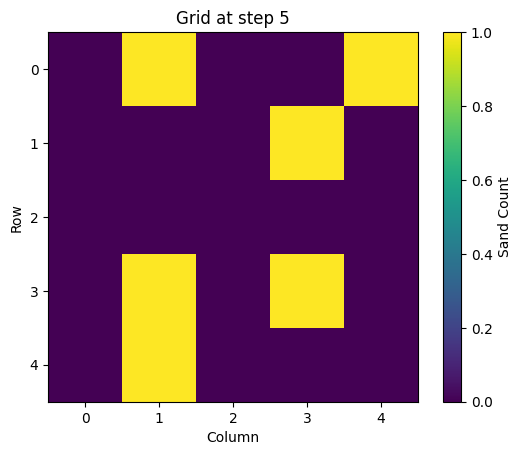

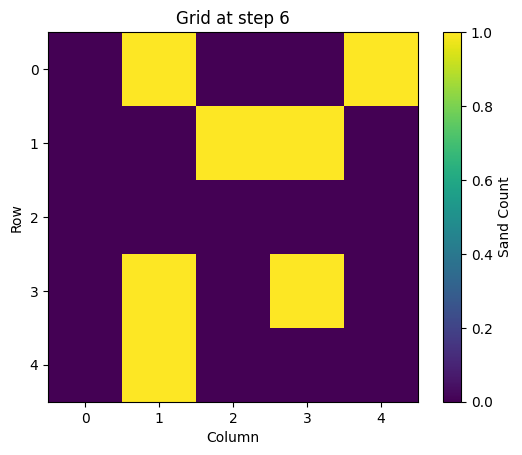

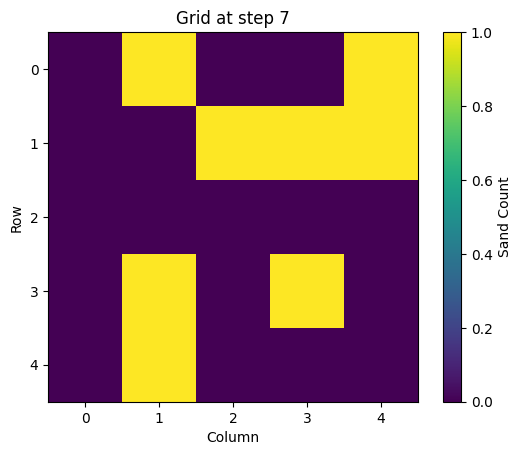

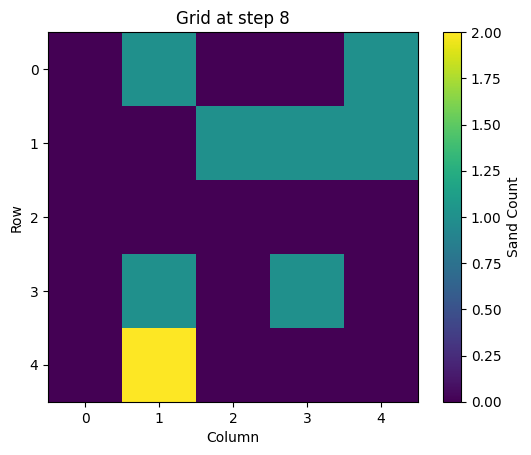

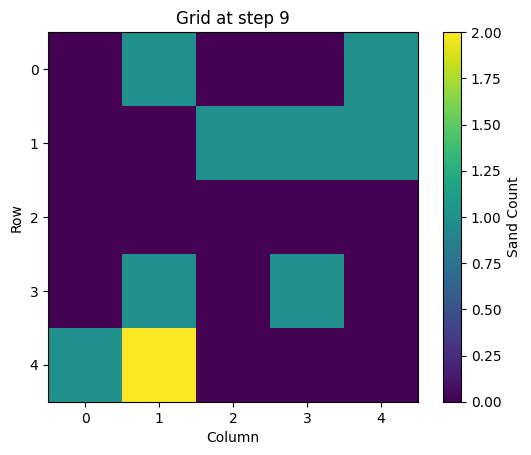

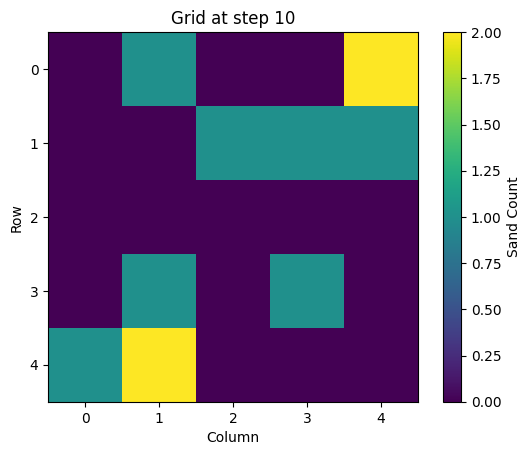

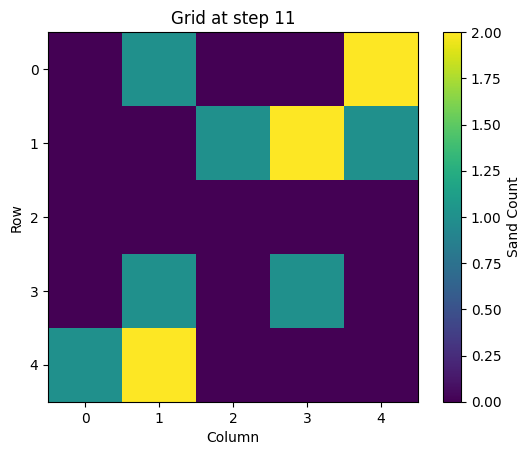

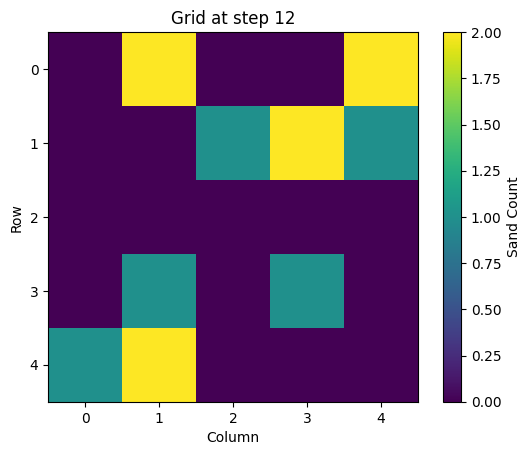

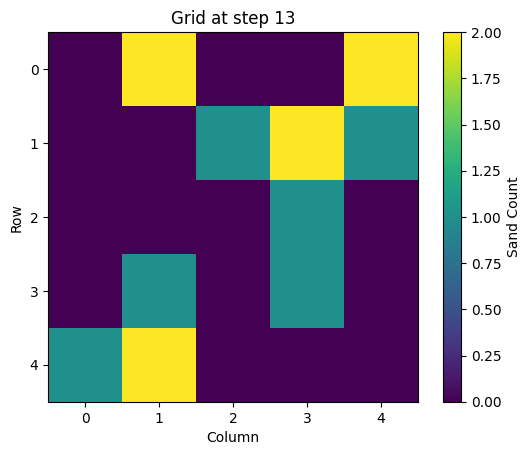

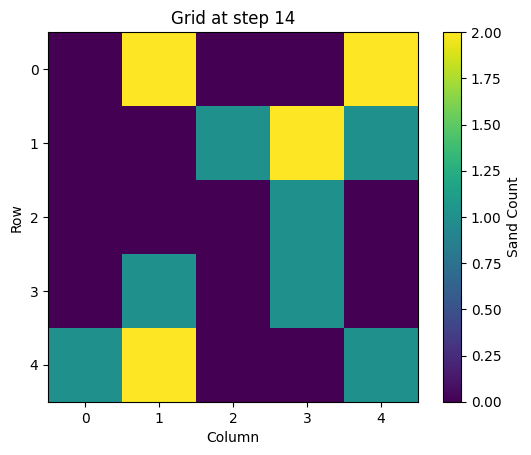

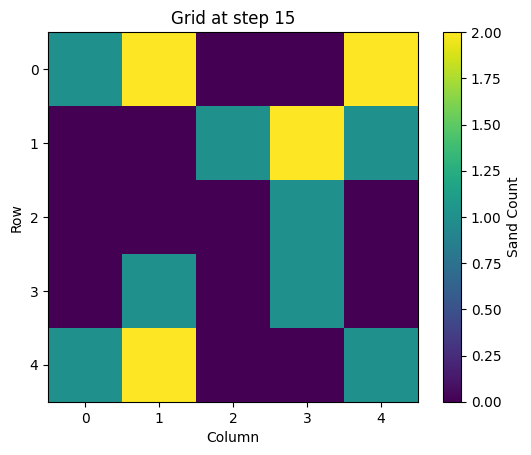

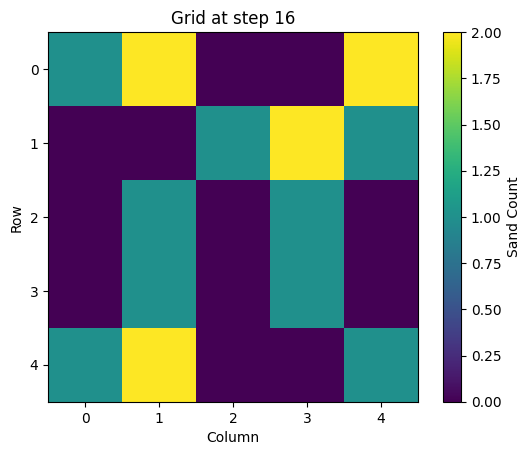

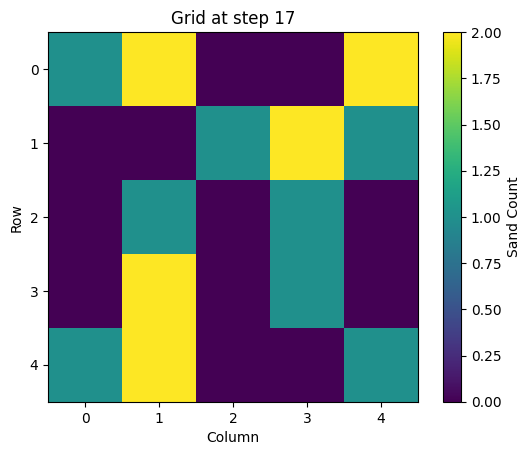

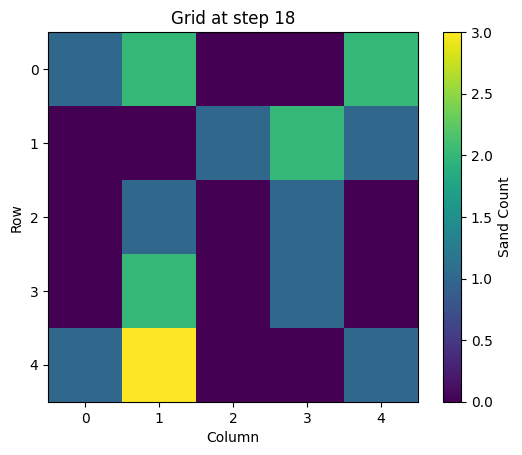

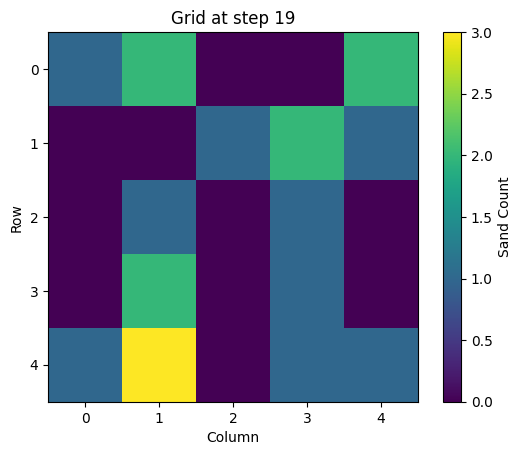

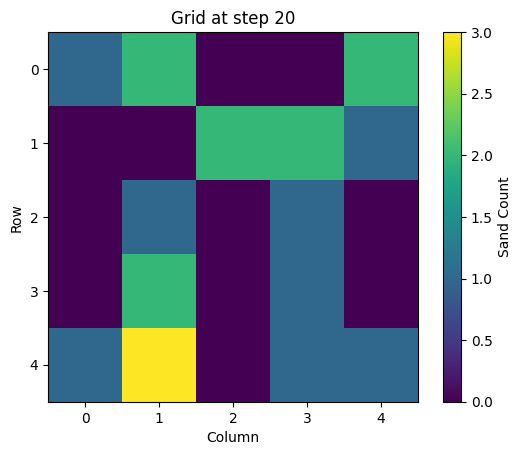

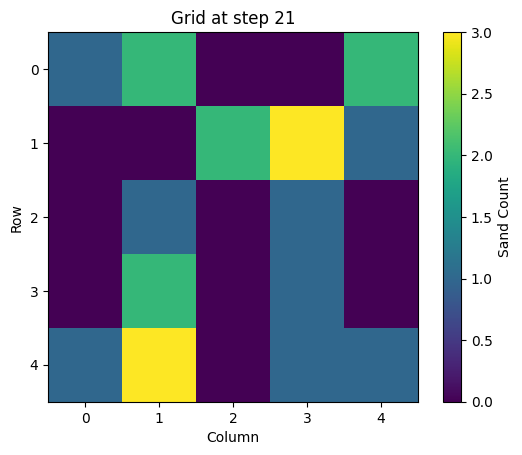

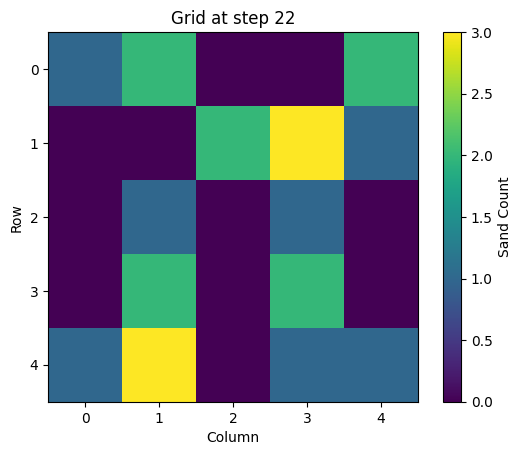

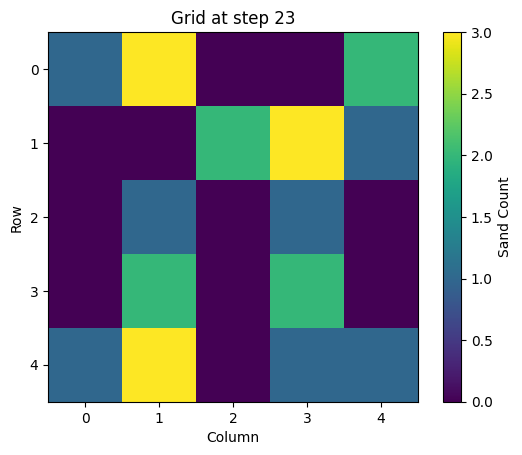

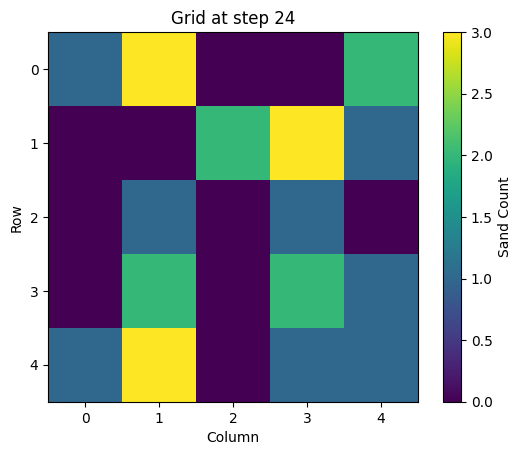

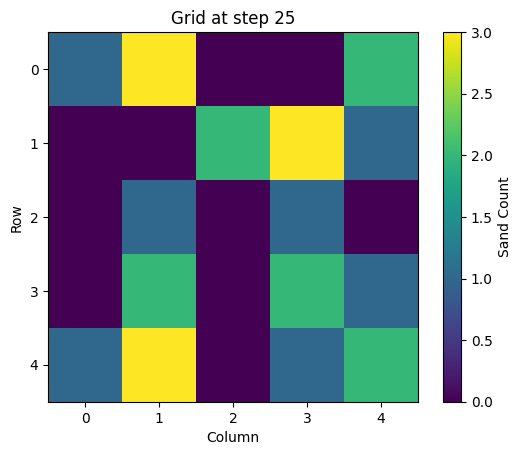

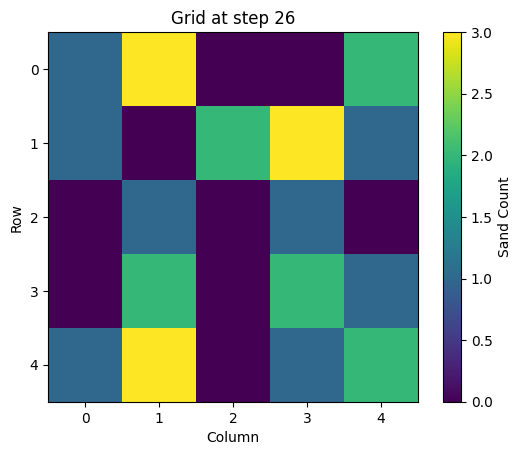

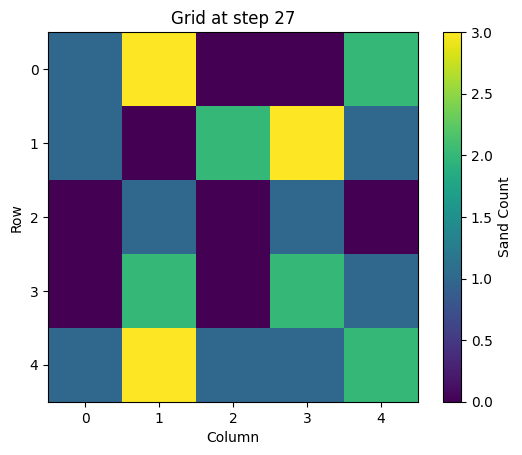

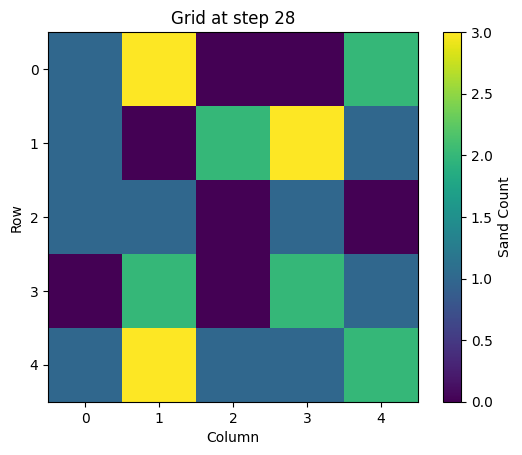

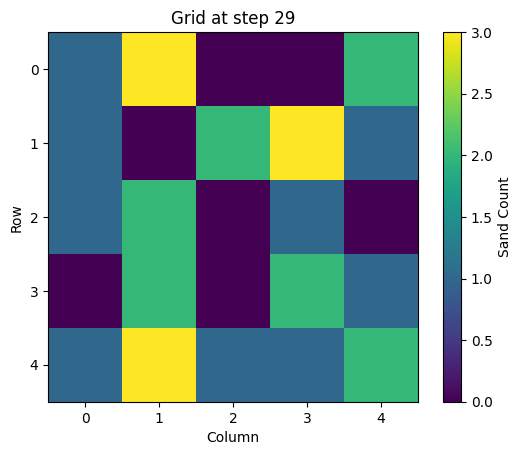

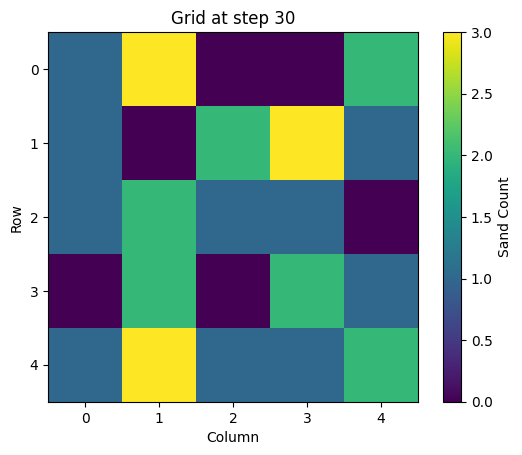

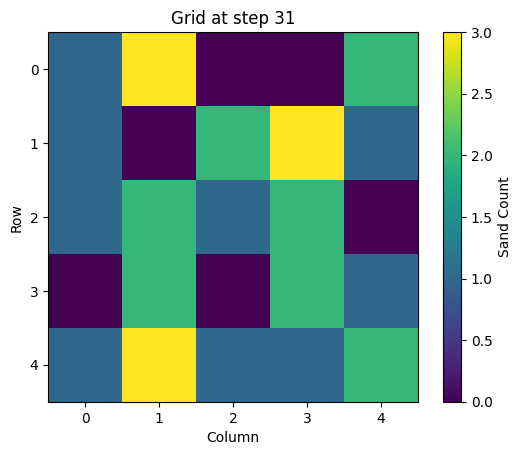

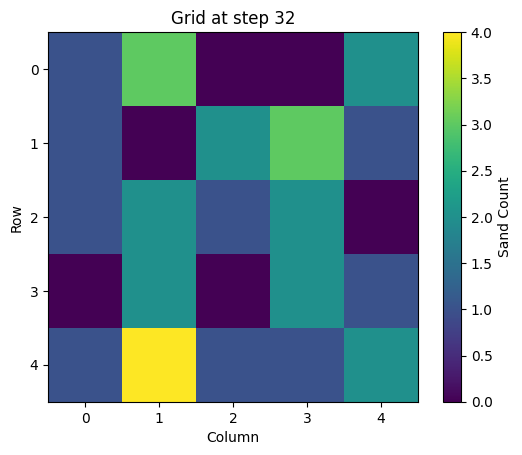

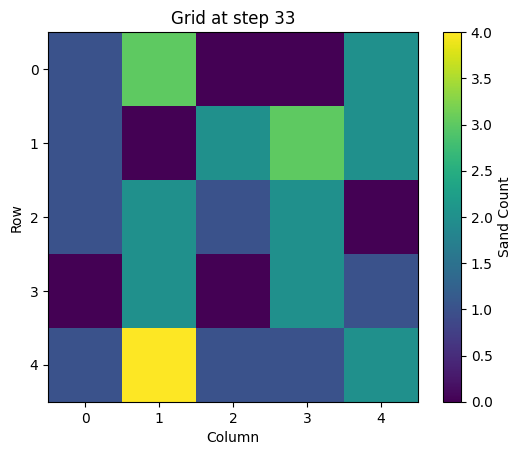

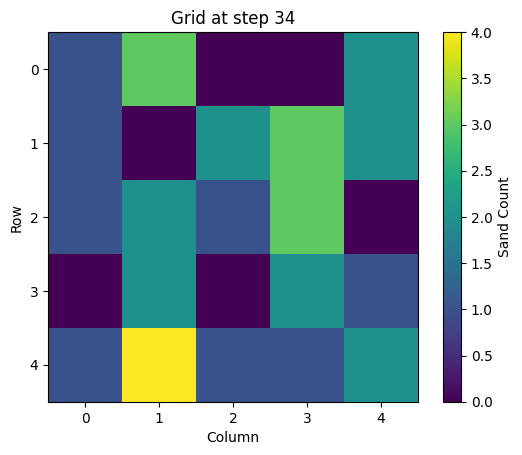

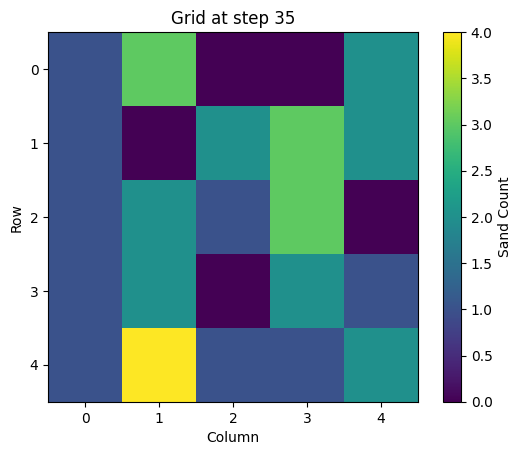

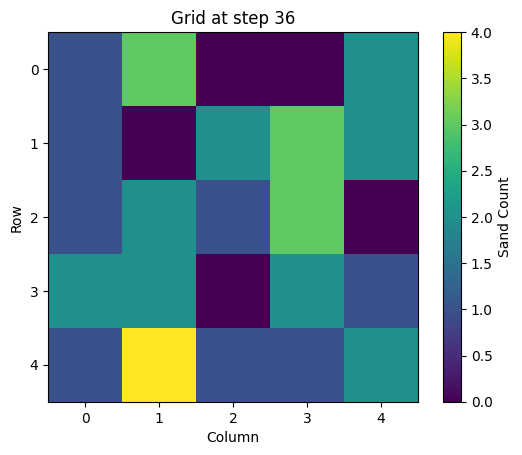

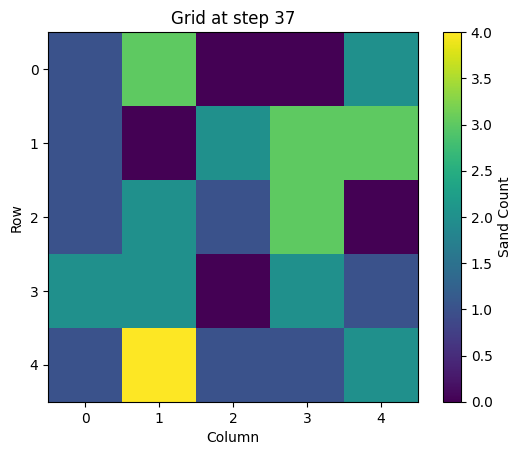

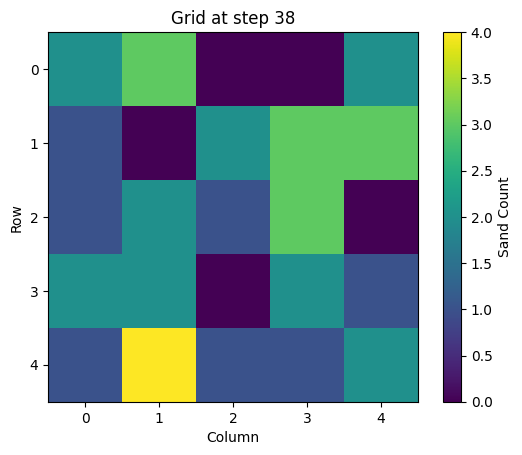

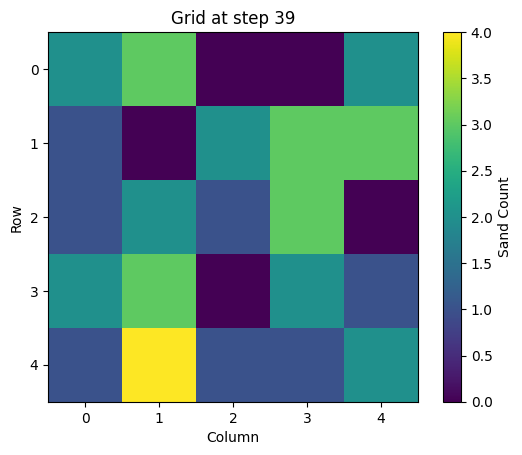

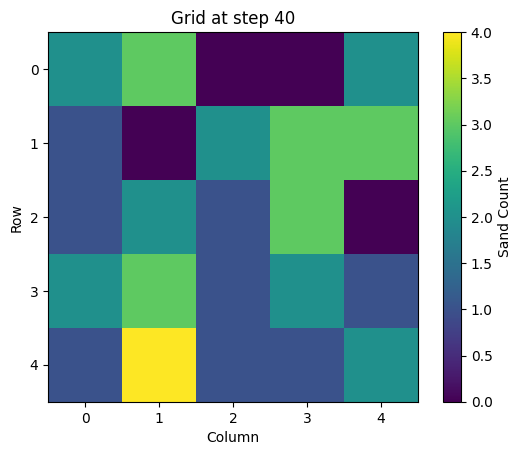

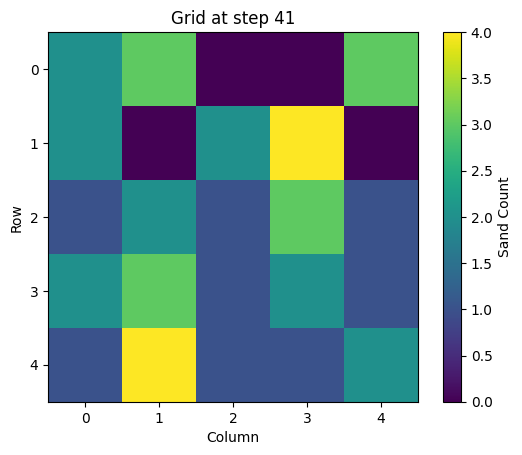

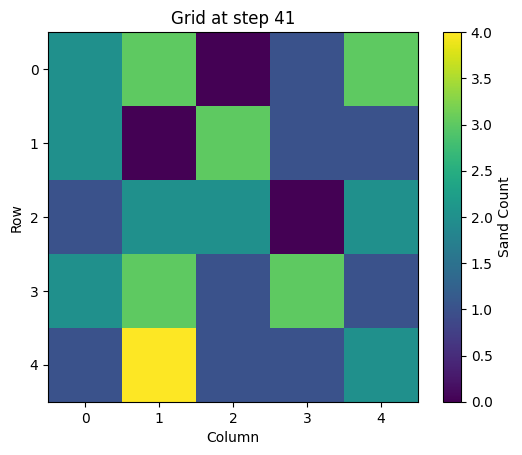

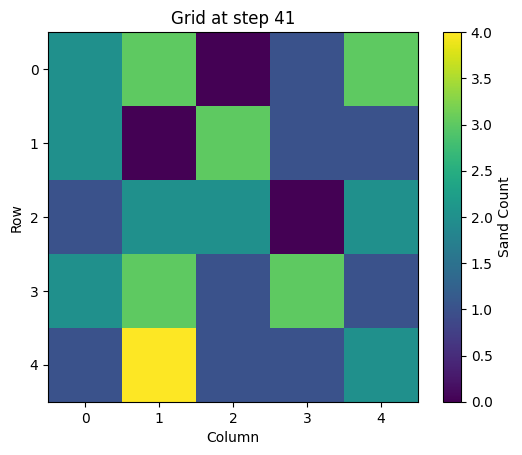

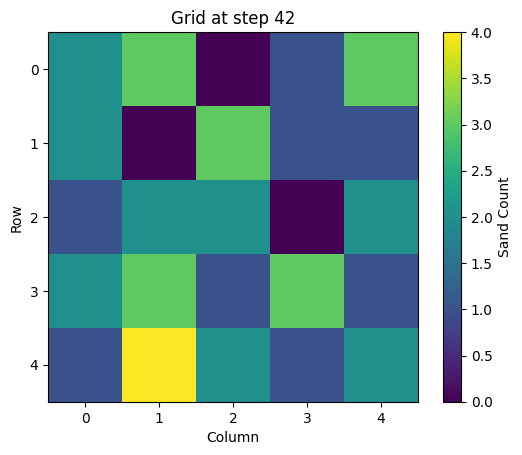

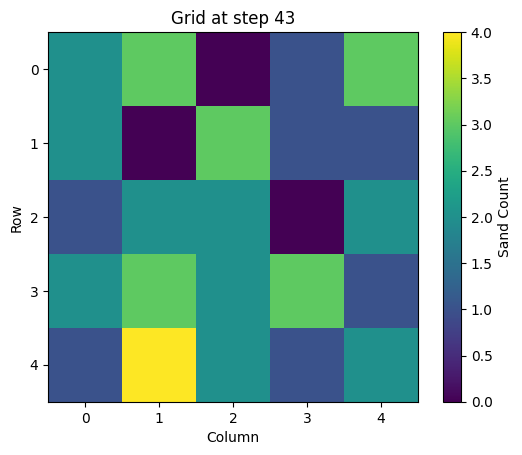

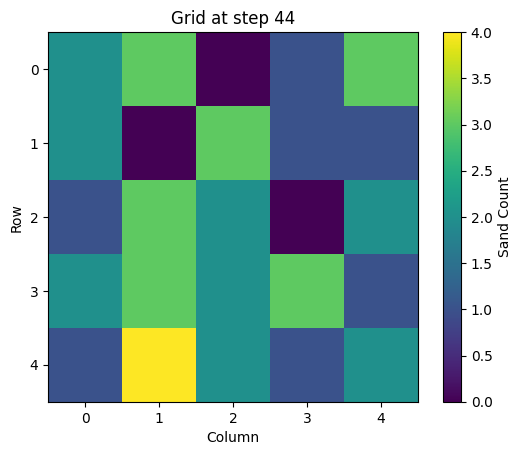

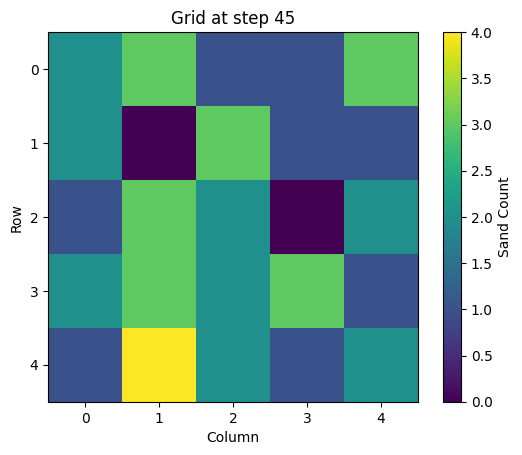

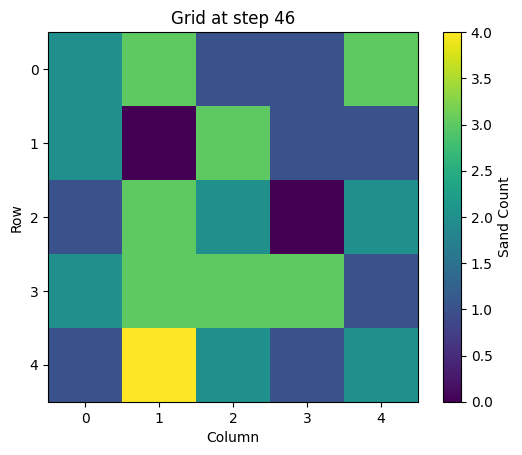

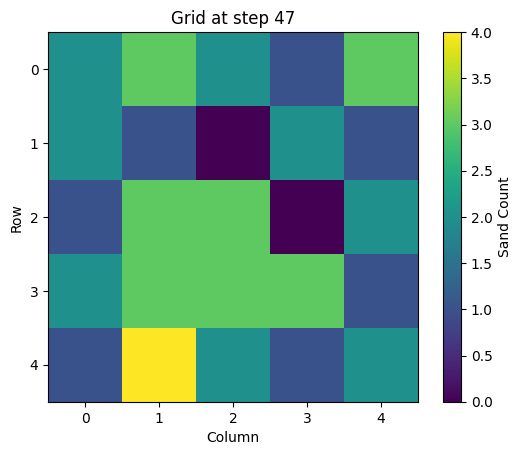

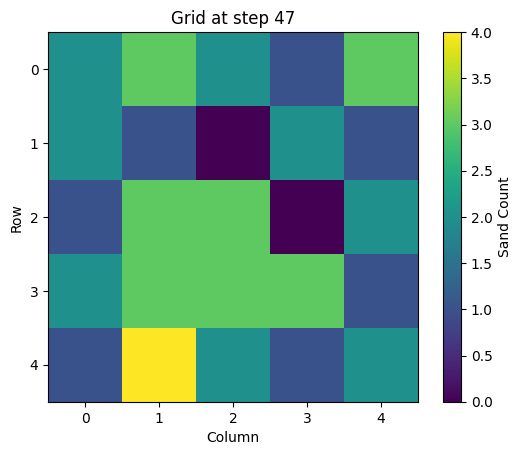

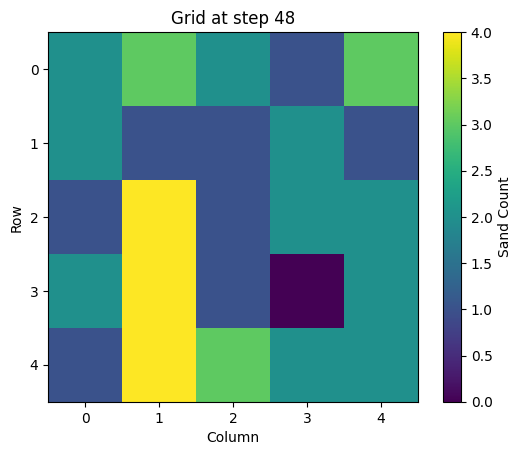

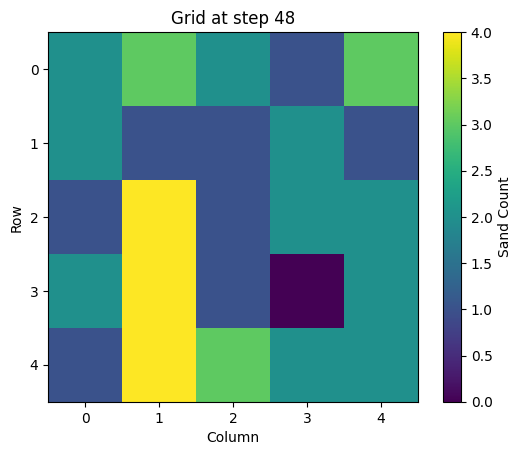

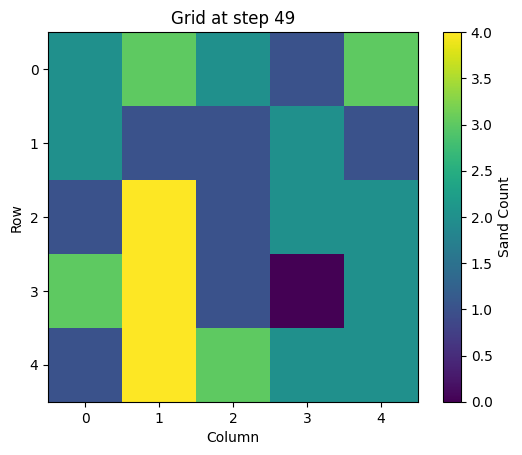

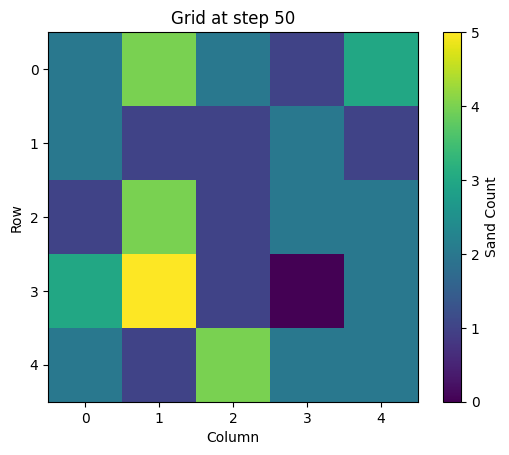

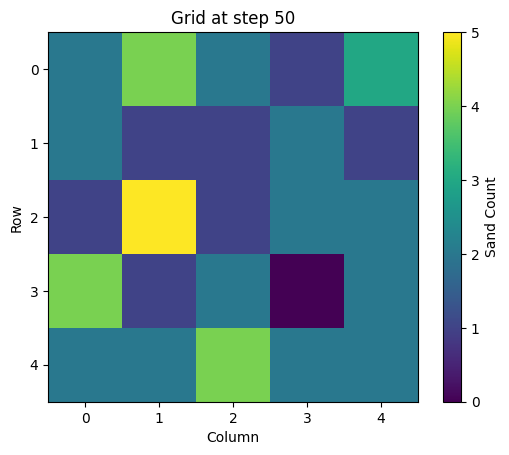

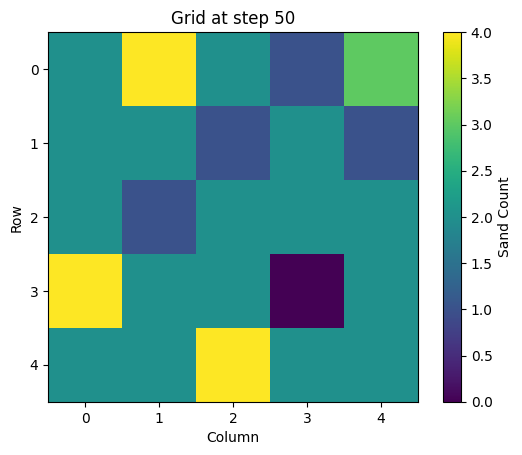

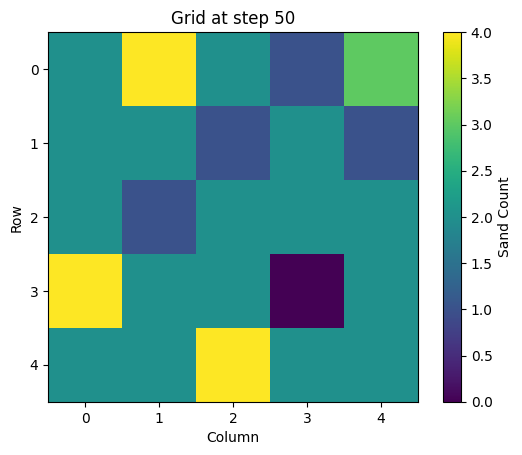

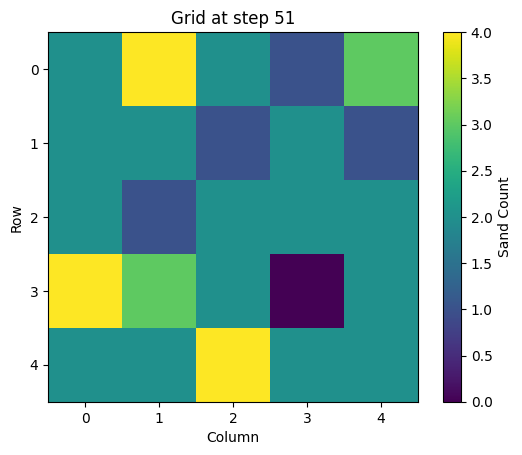

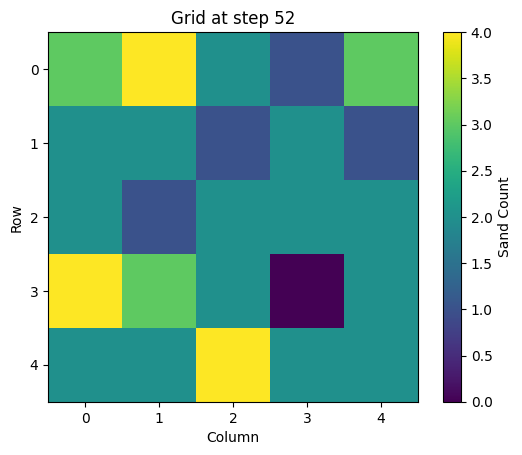

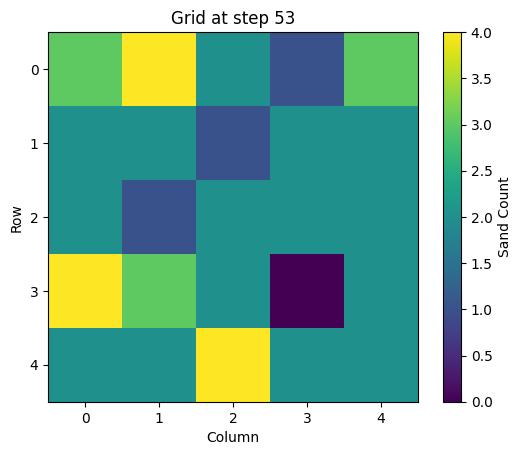

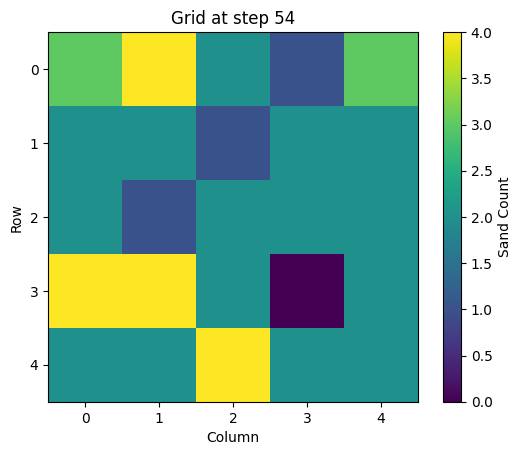

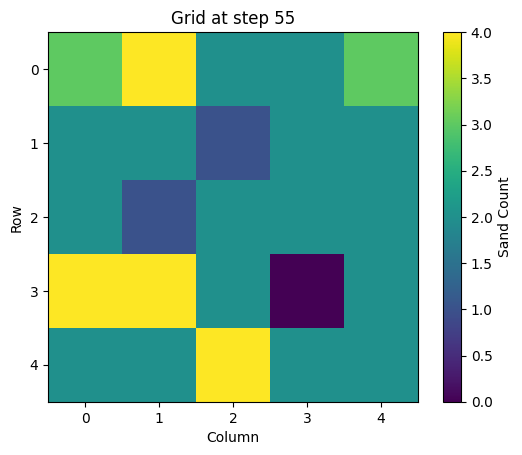

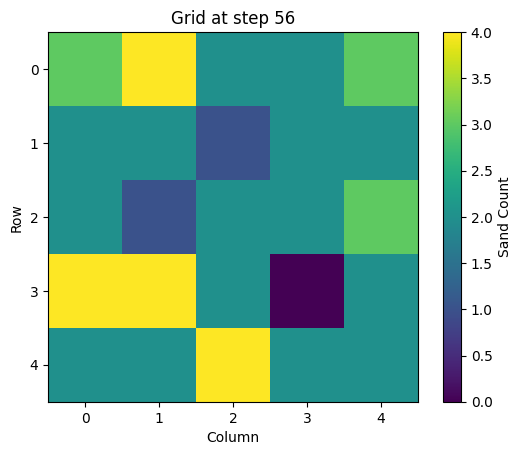

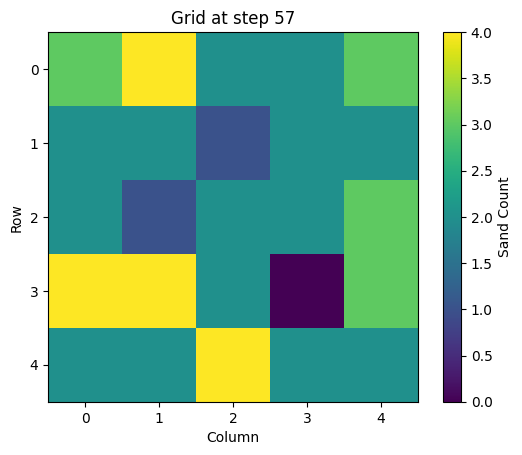

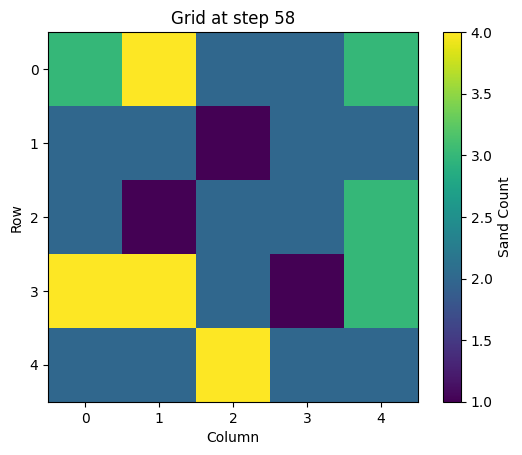

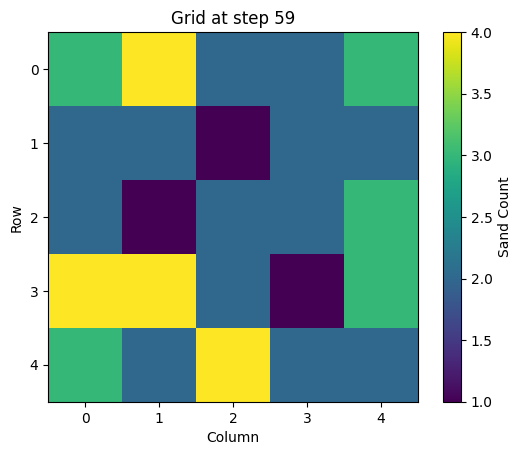

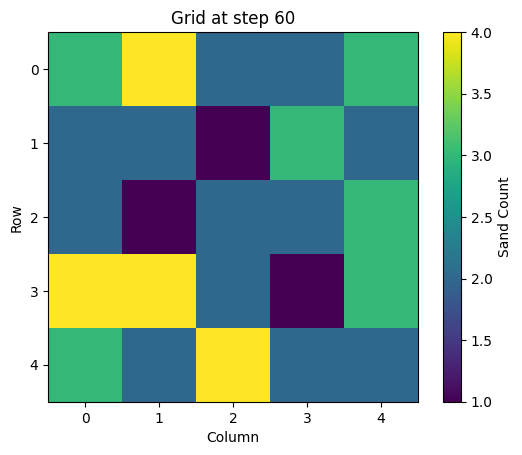

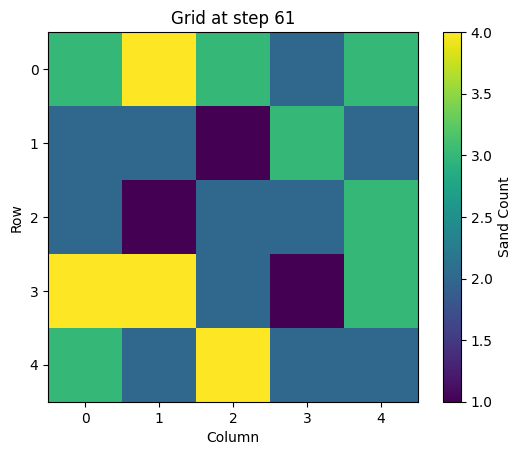

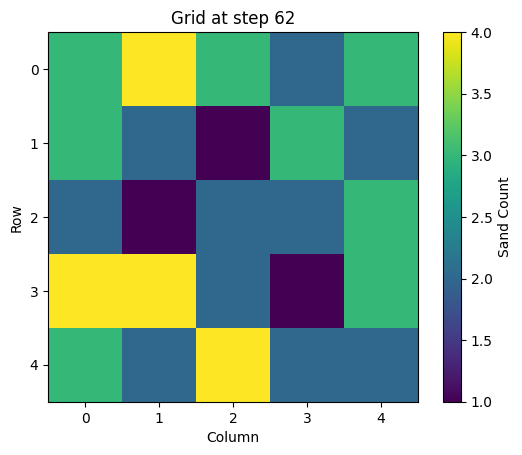

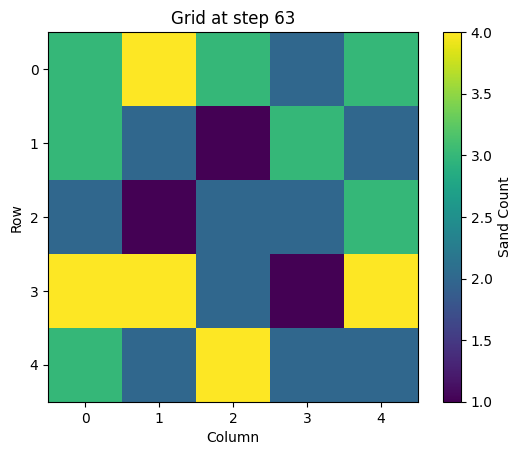

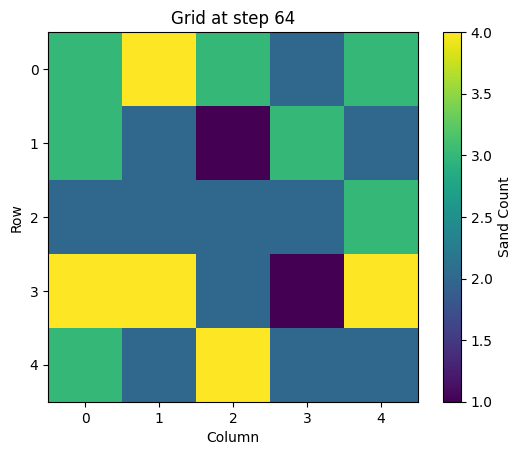

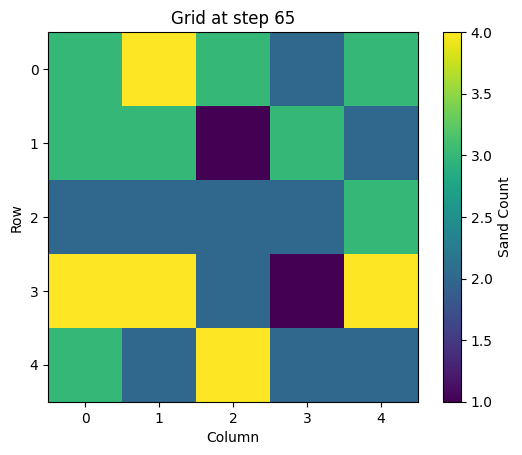

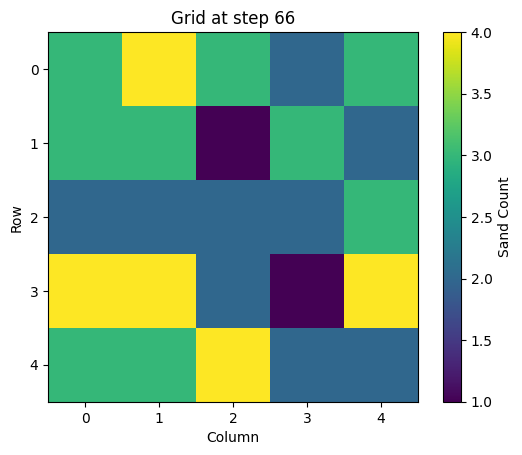

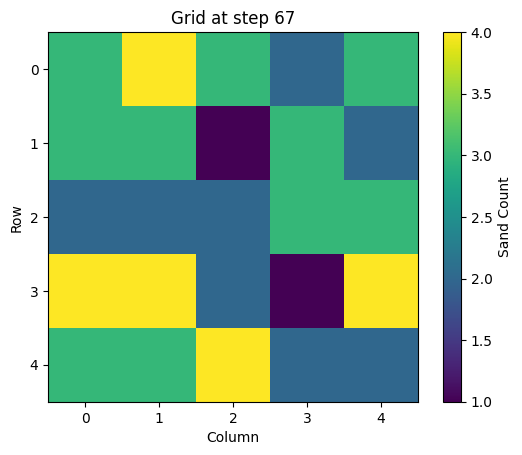

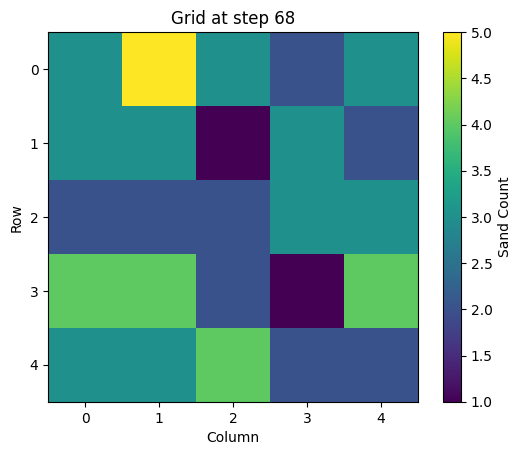

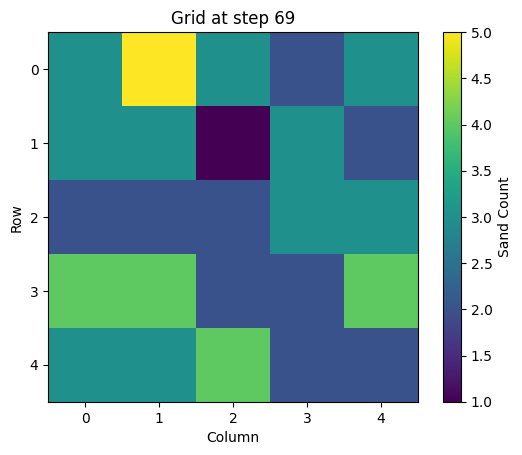

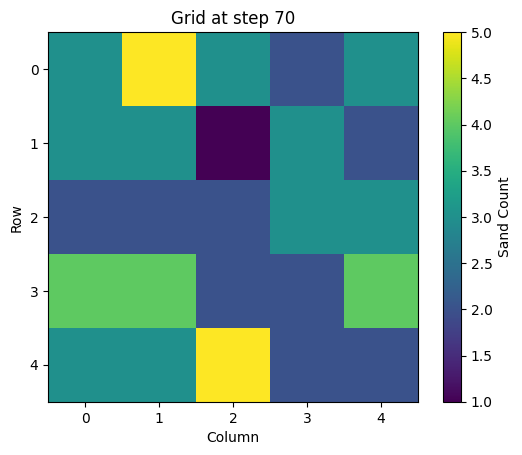

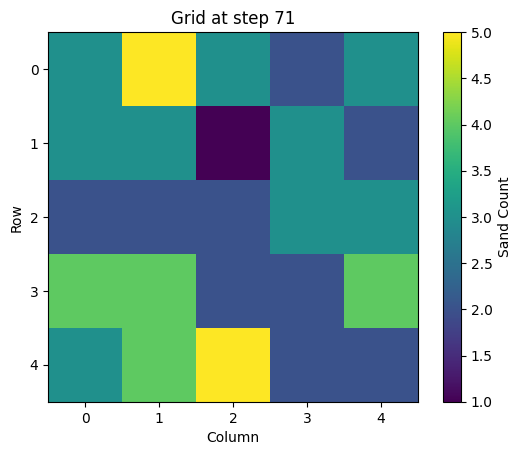

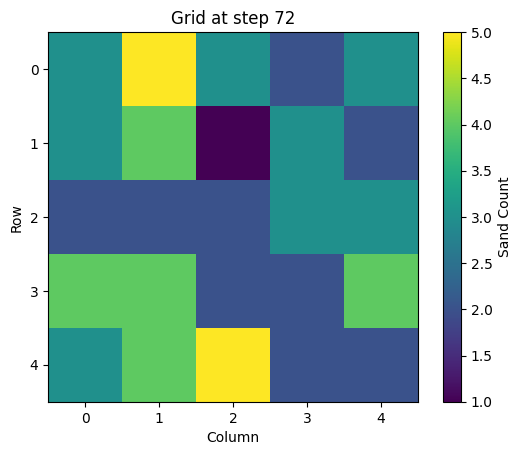

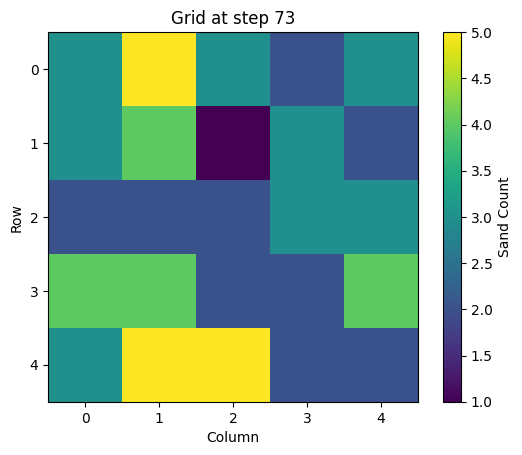

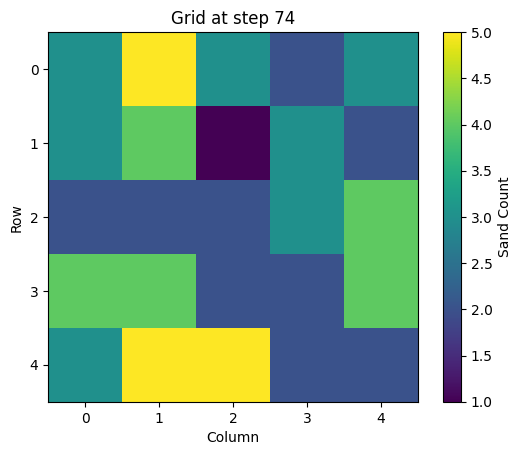

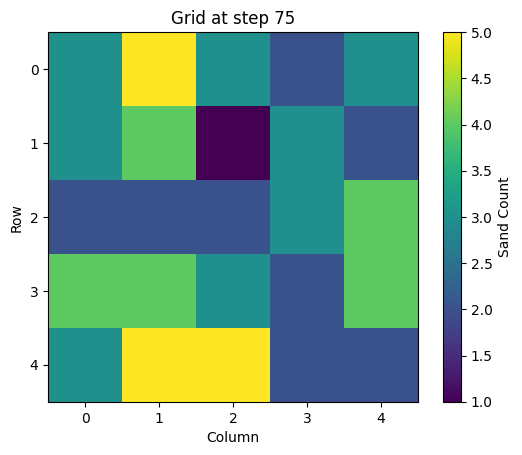

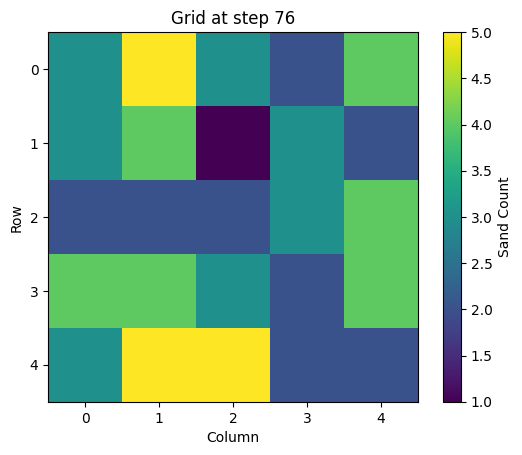

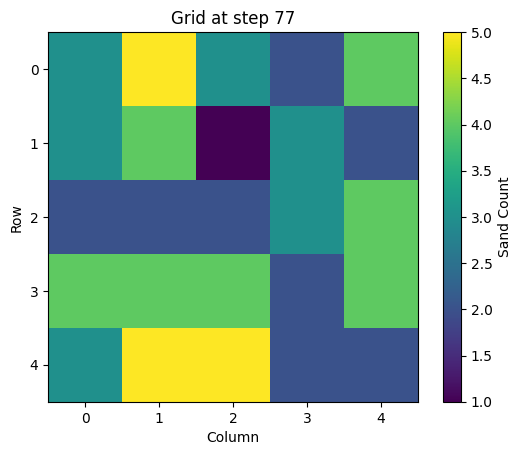

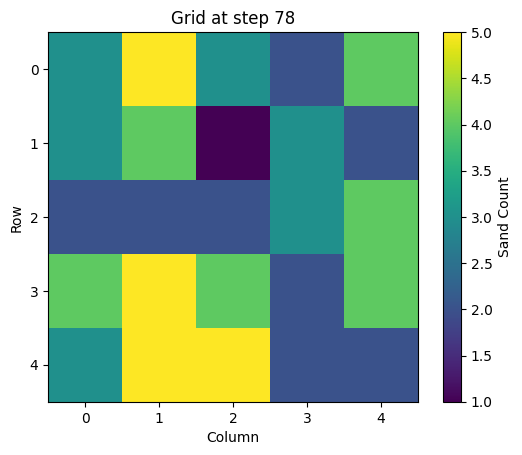

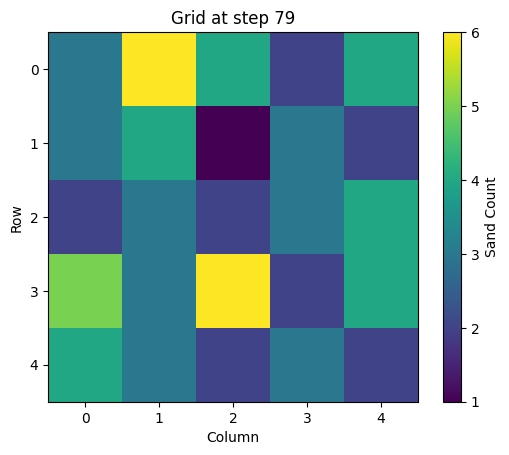

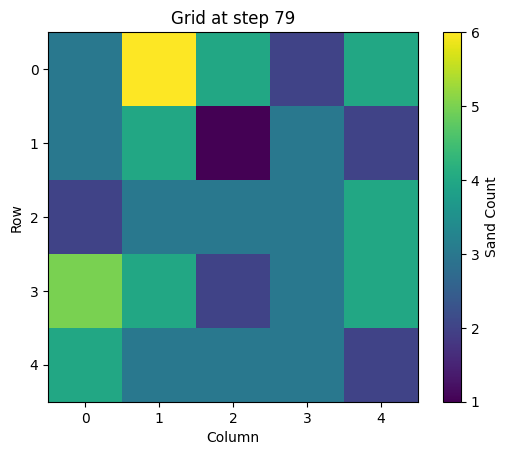

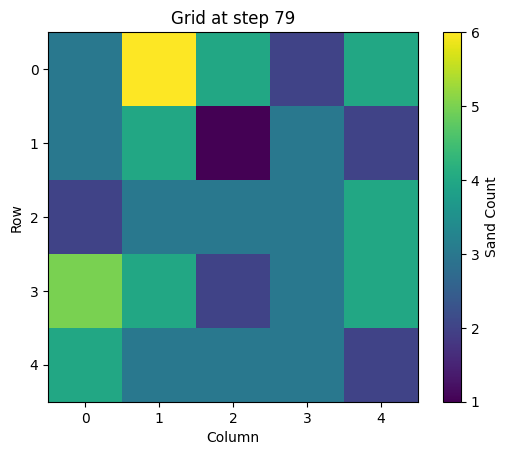

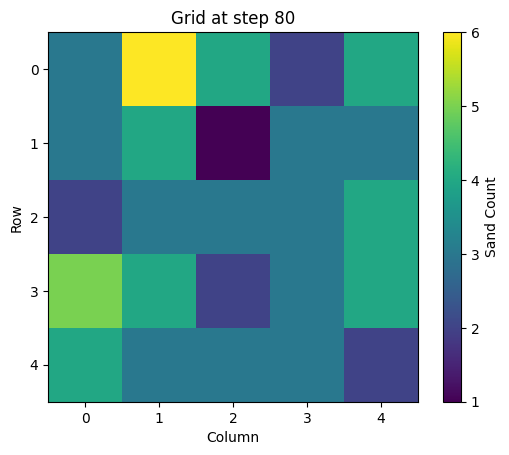

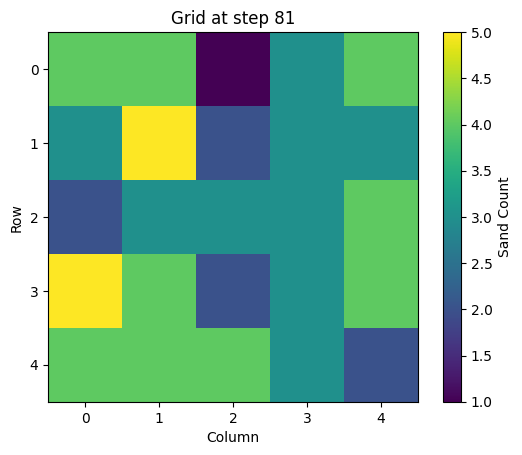

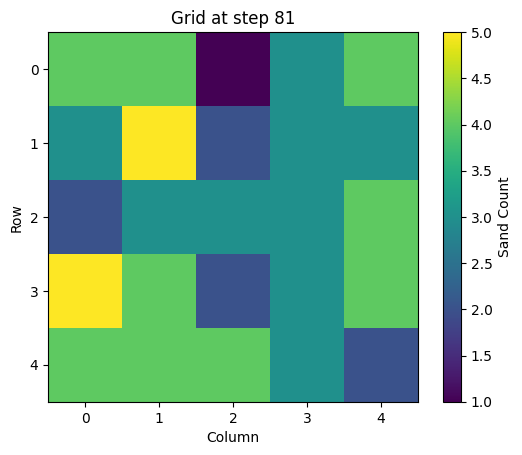

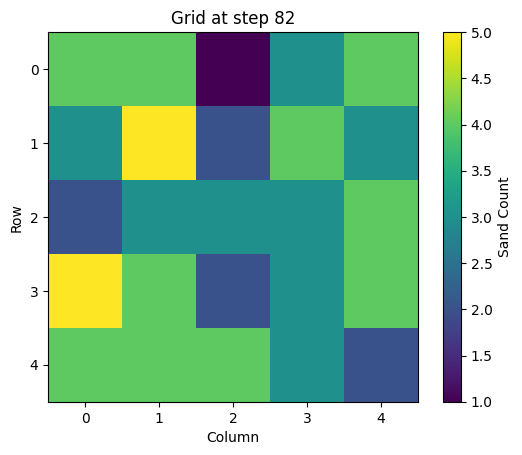

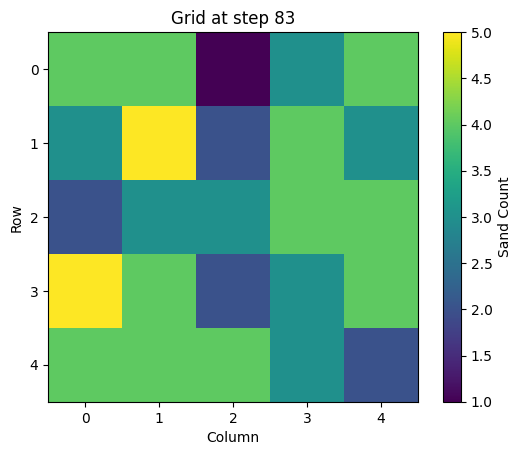

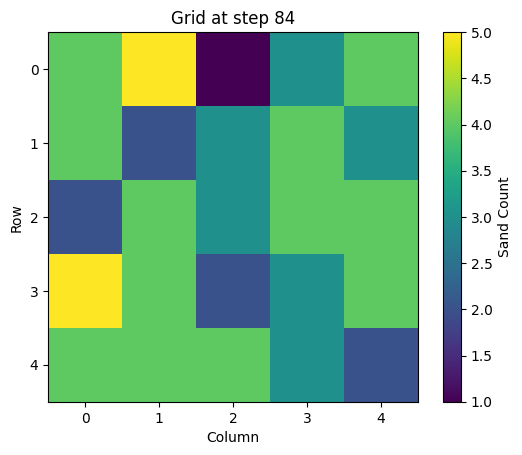

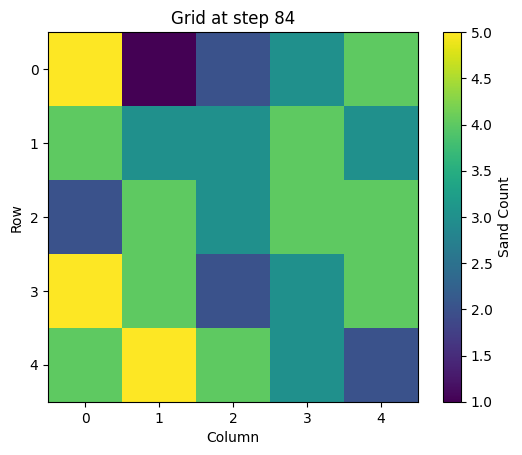

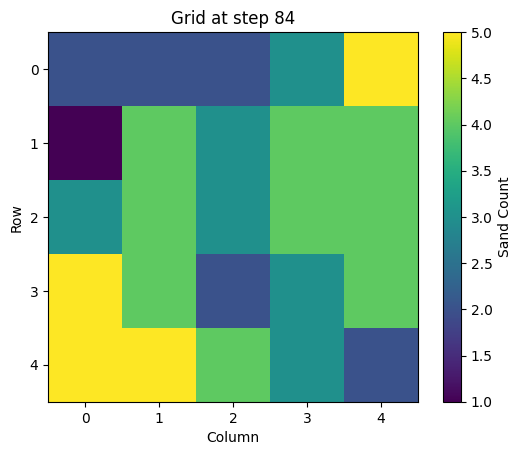

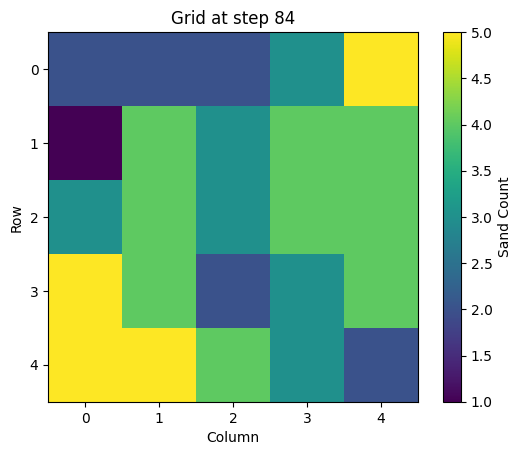

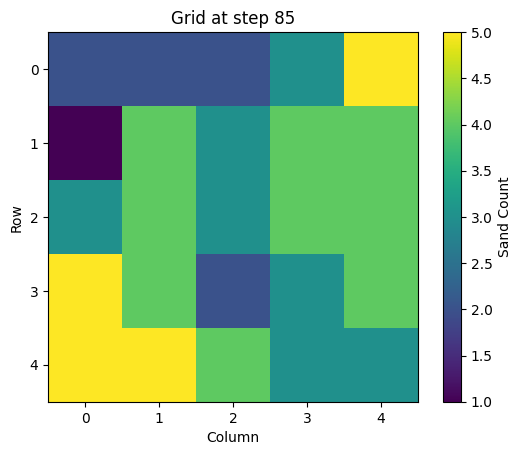

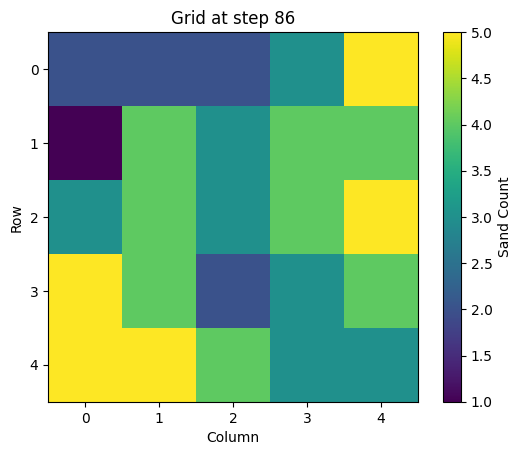

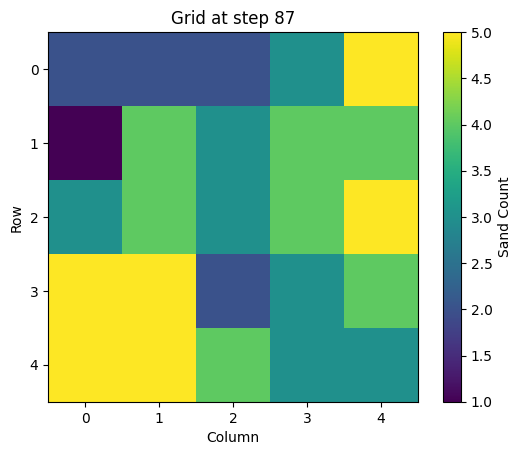

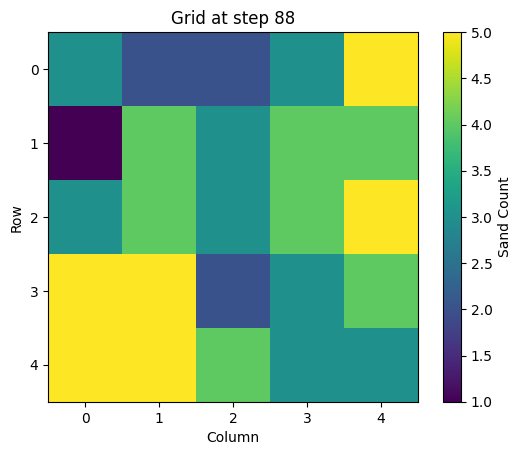

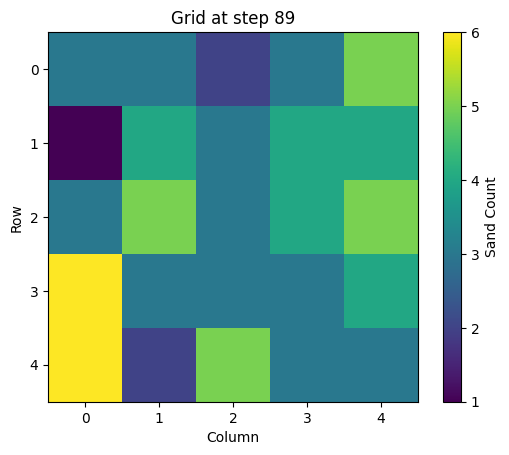

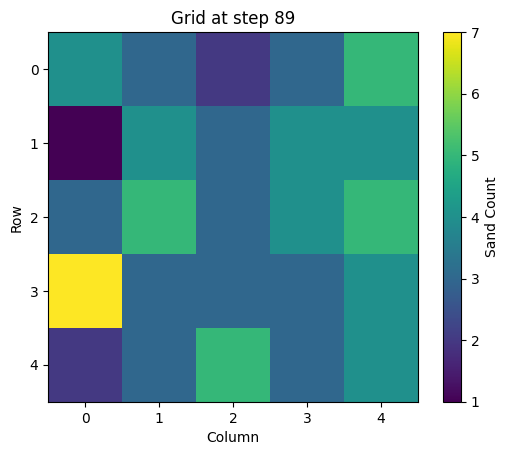

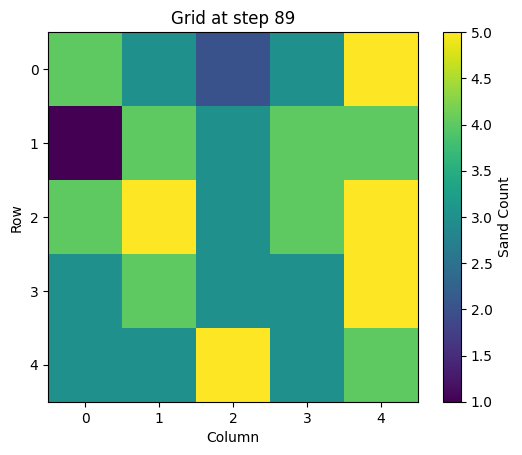

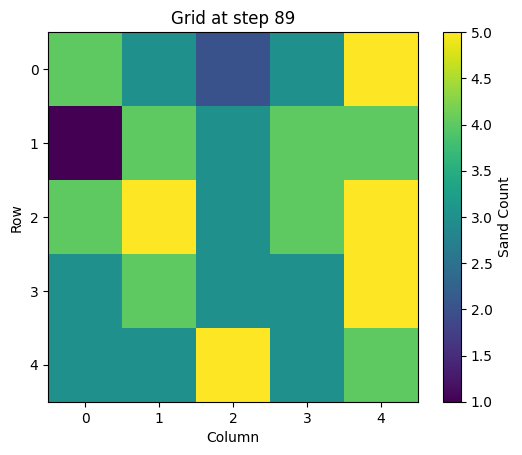

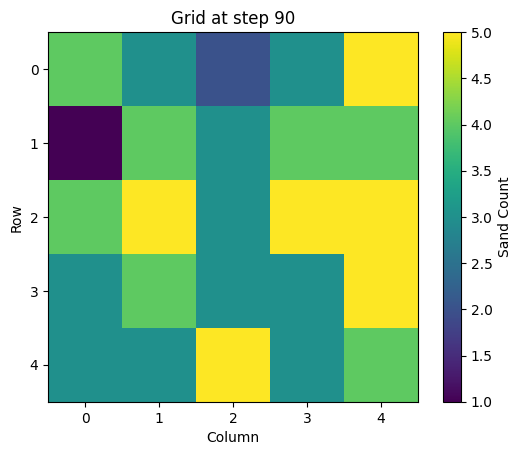

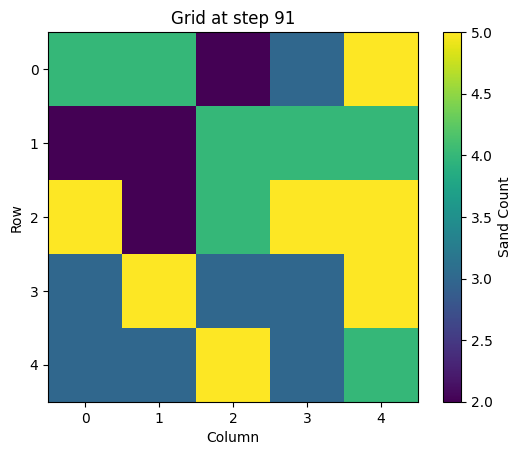

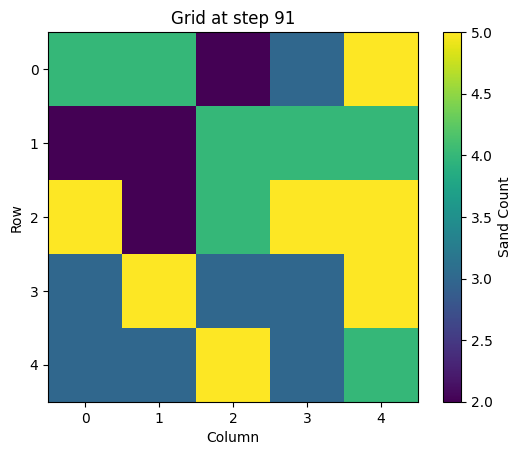

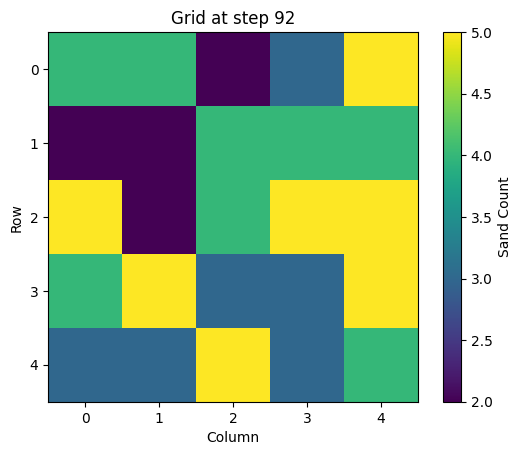

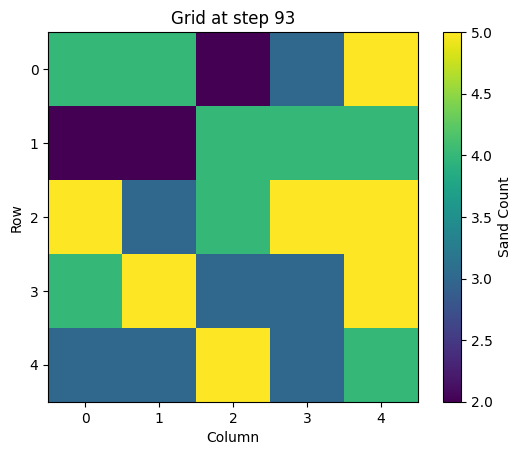

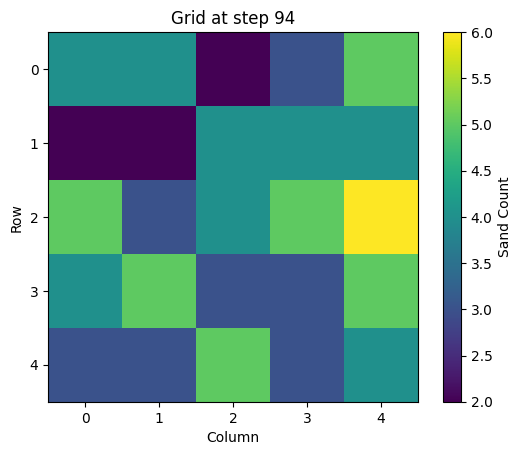

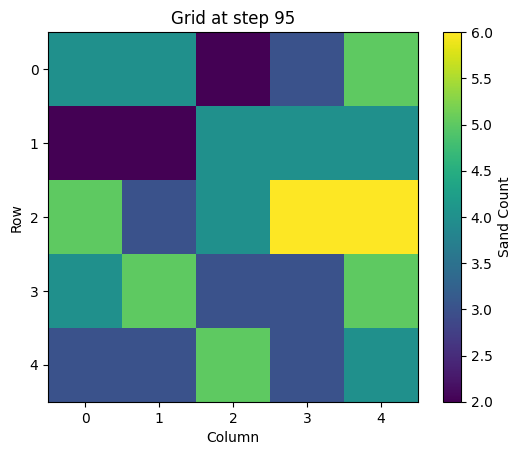

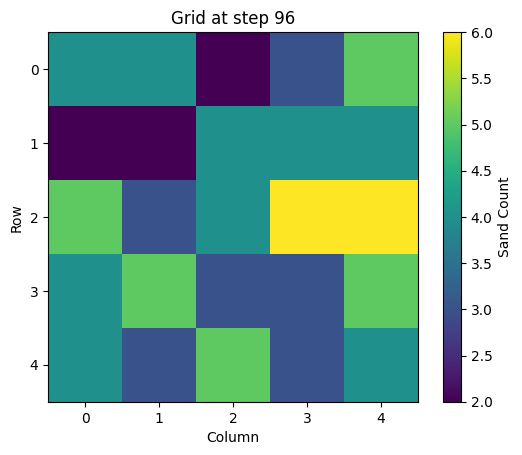

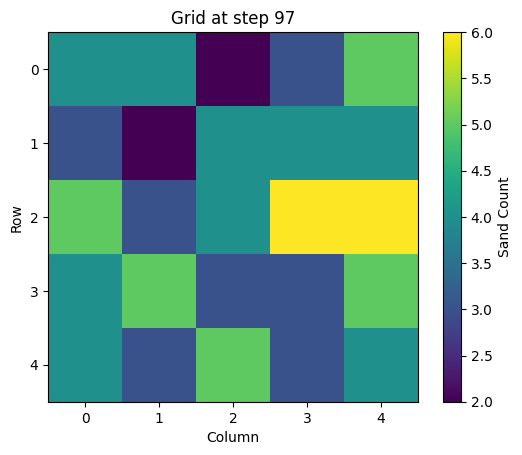

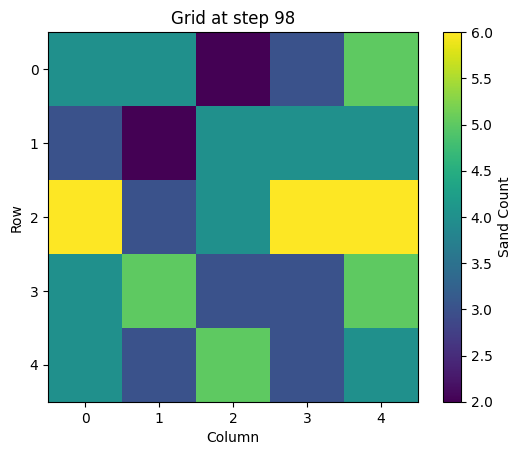

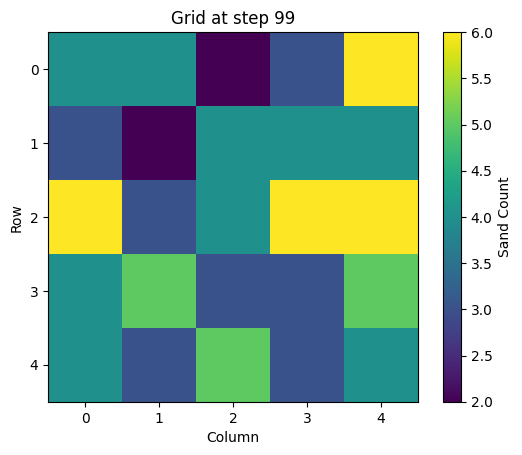

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random


def iterate(grid):
    changed = False
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if (j != len(grid[i]) - 1 and grid[i, j] - grid[i, j + 1] > 3) or \
                    (j != 0 and grid[i, j] - grid[i, j - 1] > 3) or \
                    (i != len(grid) - 1 and grid[i, j] - grid[i + 1, j] > 3) or \
                    (i != 0 and grid[i, j] - grid[i - 1, j] > 3):
                grid[i, j] -= 4
                if i > 0:
                    grid[i - 1, j] += 1
                if i < len(grid) - 1:
                    grid[i + 1, j] += 1
                if j > 0:
                    grid[i, j - 1] += 1
                if j < len(grid[i]) - 1:
                    grid[i, j + 1] += 1
                if i == 0:
                    grid[len(grid)-1, j] += 1
                if j == 0:
                    grid[i, len(grid)-1] += 1
                if i == len(grid) - 1:
                    grid[0, j] += 1
                if j == len(grid) - 1:
                    grid[i, 0] += 1
                changed = True
    return grid, changed


def simulate(grid, step):
    while True:
        grid, changed = iterate(grid)
        plot_sandpile(grid, step)
        if not changed:
            return grid


def plot_sandpile(grid, step):
    plt.figure()
    plt.imshow(grid, cmap='viridis', interpolation='nearest')
    plt.title(f'Grid at step {step}')
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.colorbar(label='Sand Count')


def initialize_grid(rows, cols, sand_density=0.5):
    start_grid = np.zeros((rows, cols))
    return start_grid


def evolution(grid, steps):
    for step in range(steps):
        rand_row = random.randint(0, len(grid) - 1)
        rand_col = random.randint(0, len(grid[0]) - 1)
        grid[rand_row, rand_col] += 1
        simulate(grid, step)


def sandpile(rows, cols, steps):
    grid = initialize_grid(rows, cols)
    evolution(grid, steps)


sandpile(5, 5, 100)
